In [154]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [155]:
import pandas as pd

# Load the dataset
data = pd.read_csv('aus.csv')

# Display the first few rows of the dataset
data.head()


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

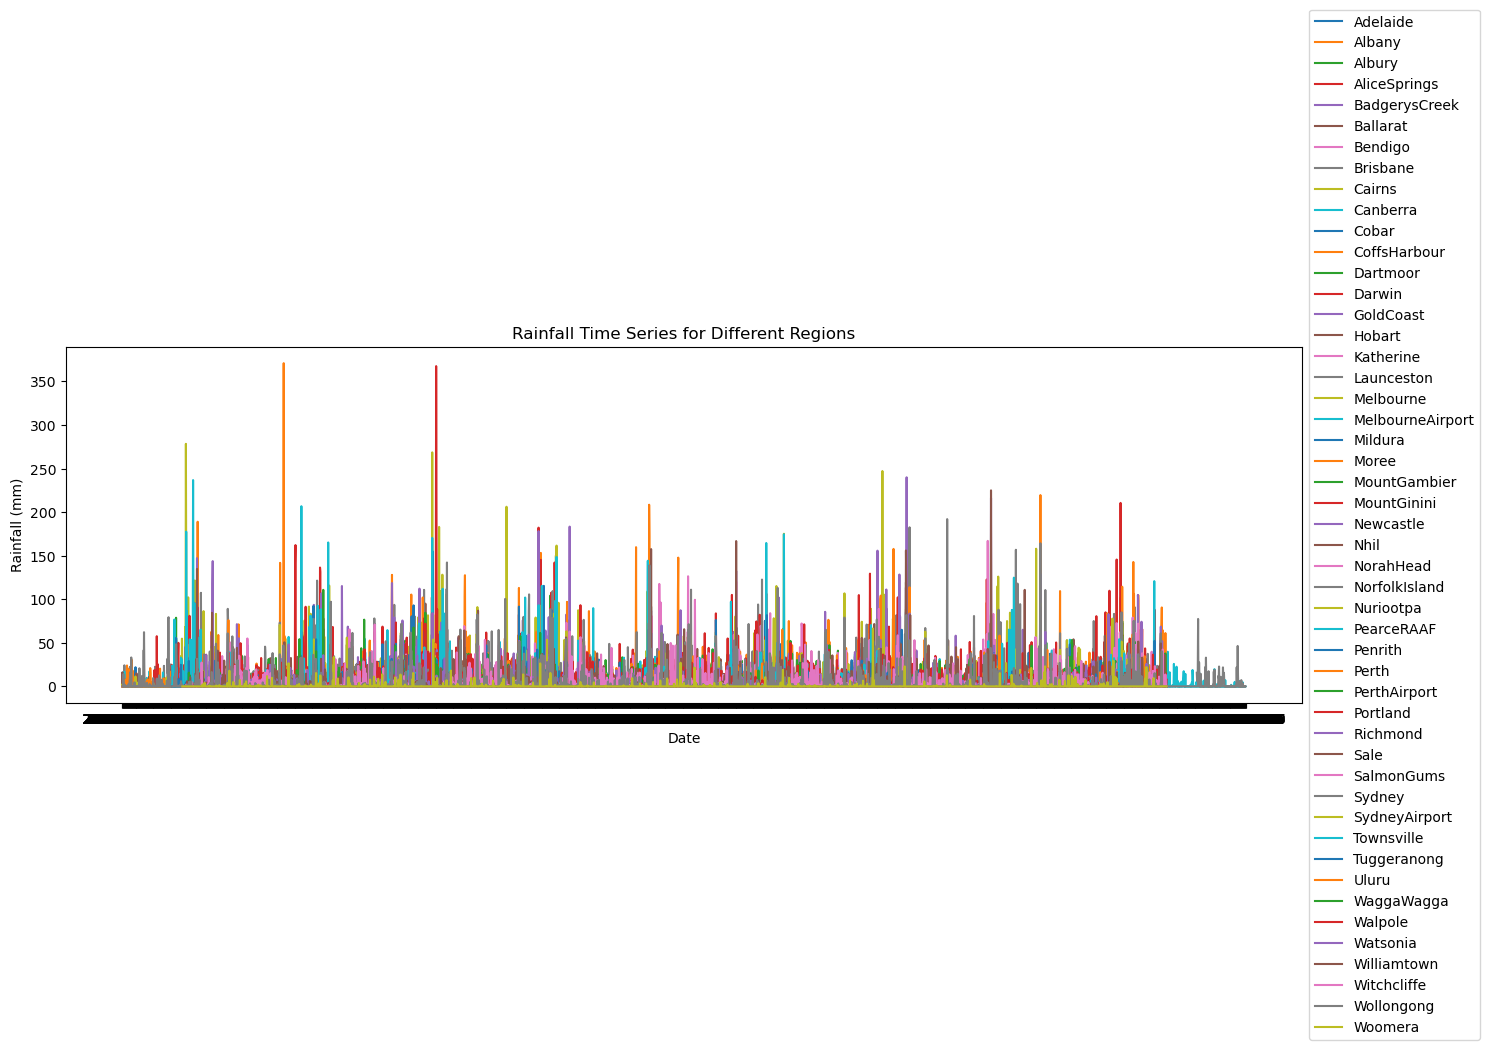

In [156]:
import matplotlib.pyplot as plt

# Group the data by 'Location' and 'Date' and sum the 'Rainfall'
grouped_data = data.groupby(['Location', 'Date'])['Rainfall'].sum().reset_index()

# Plotting the time series data for each location
plt.figure(figsize=(15, 8))

locations = grouped_data['Location'].unique()

for location in locations:
    location_data = grouped_data[grouped_data['Location'] == location]
    plt.plot(location_data['Date'], location_data['Rainfall'], label=location)

plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Time Series for Different Regions')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


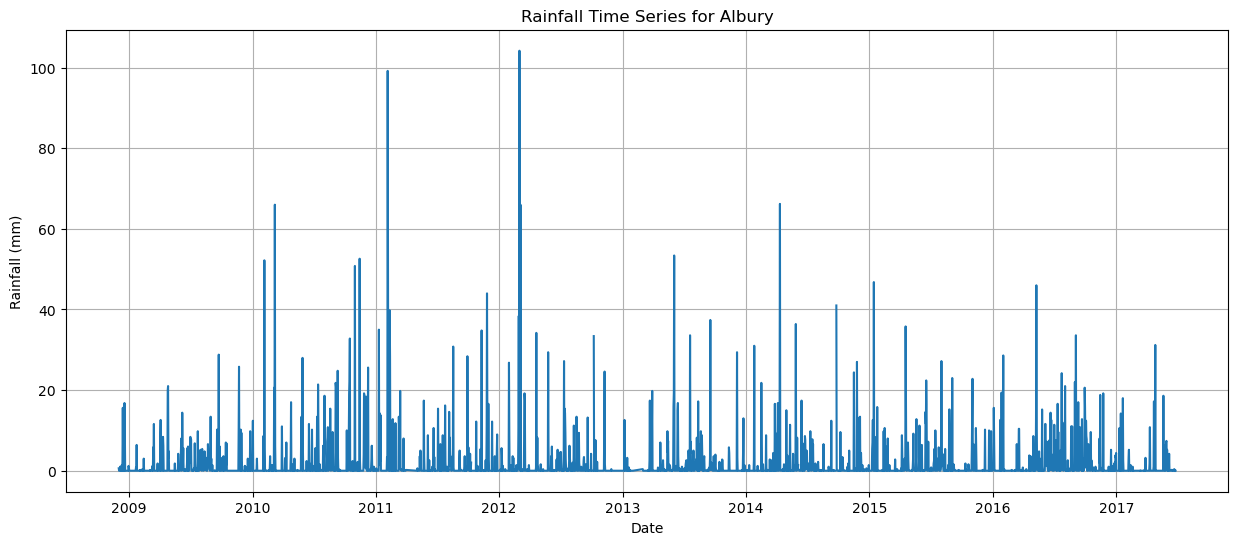

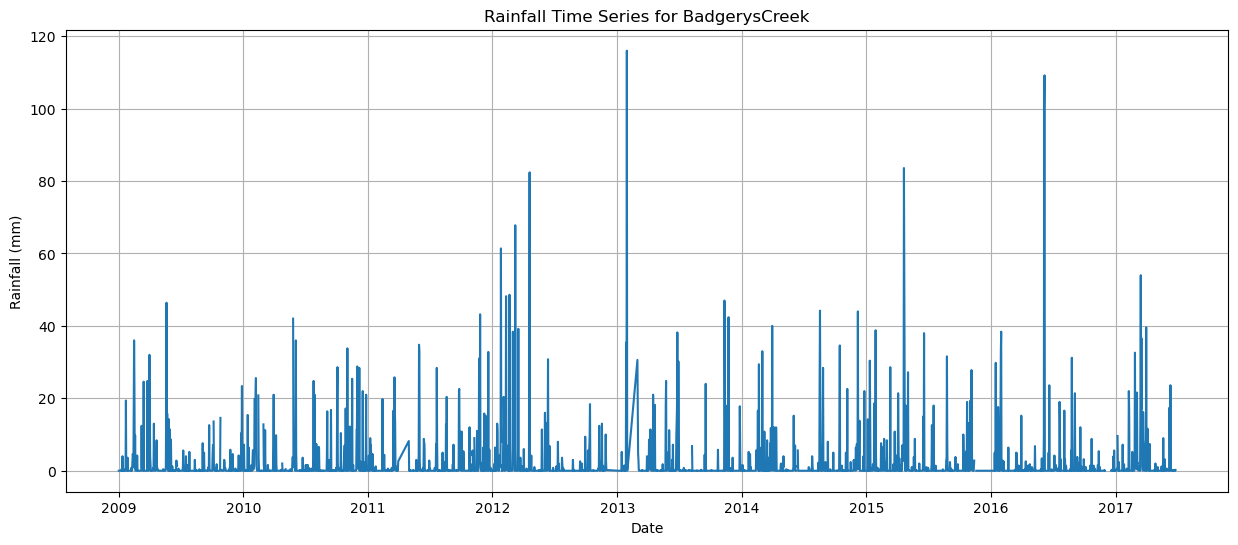

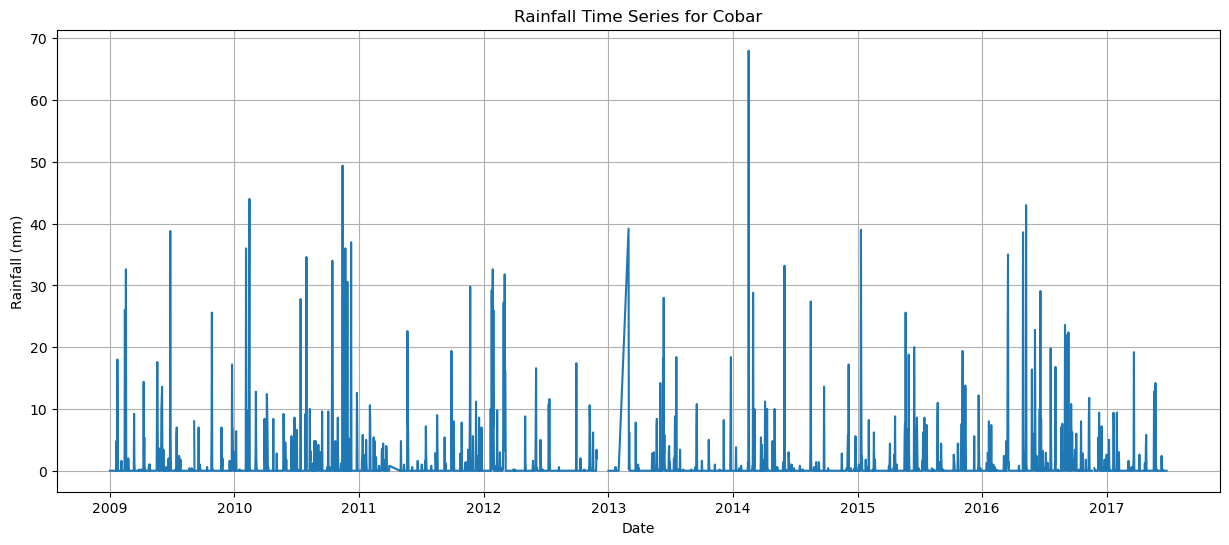

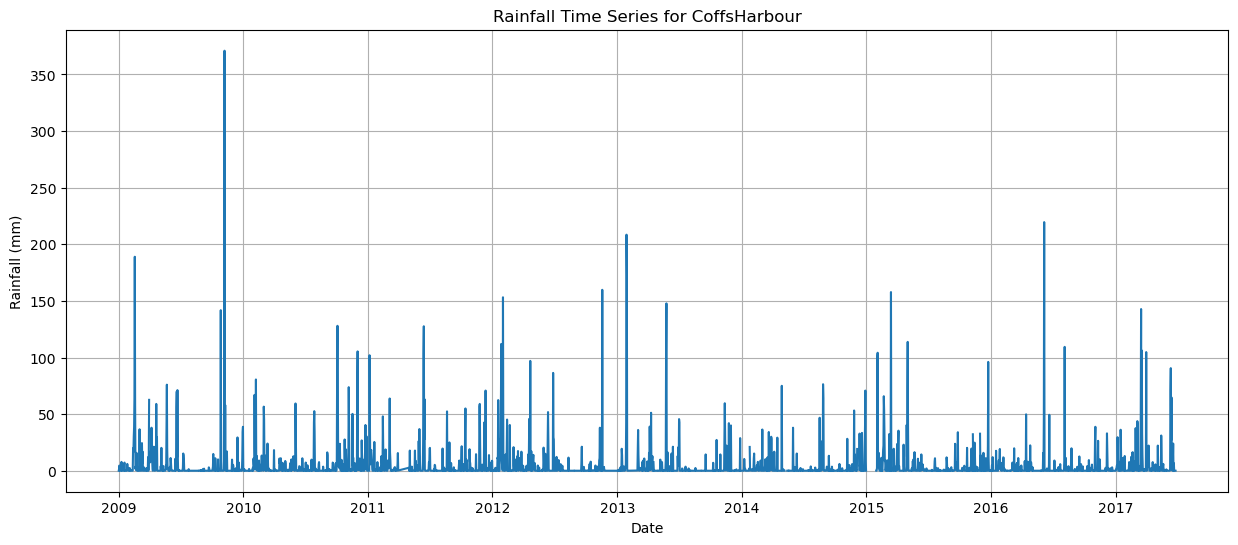

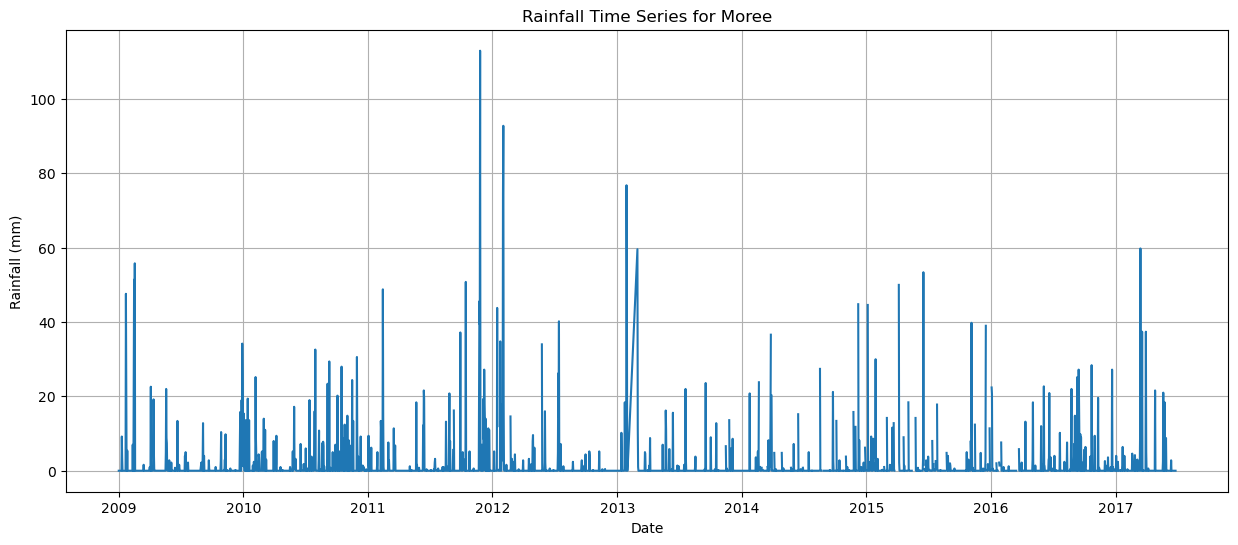

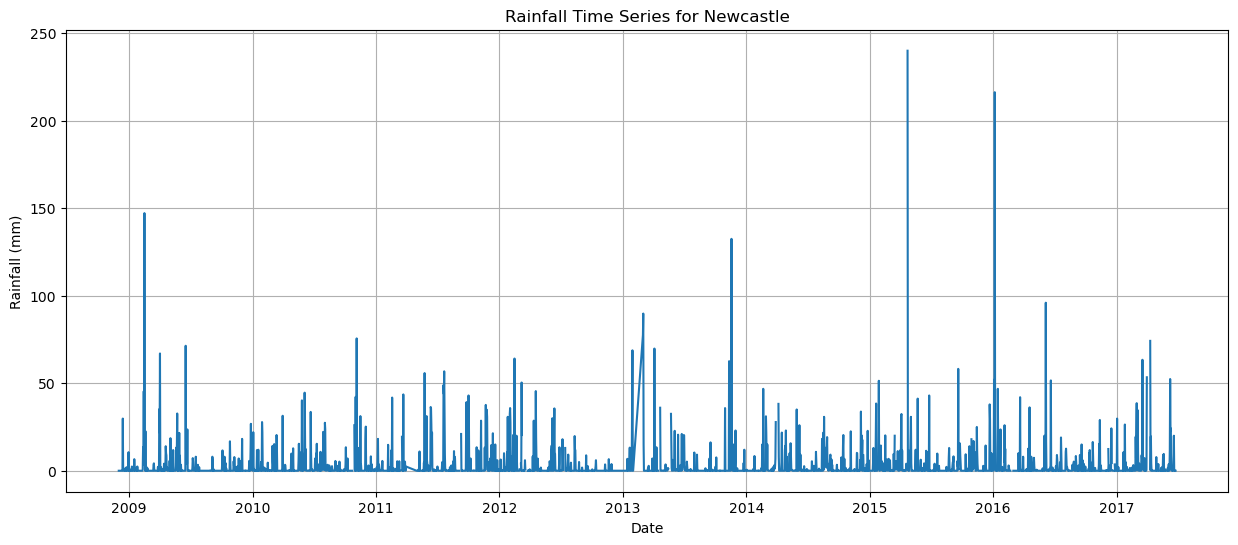

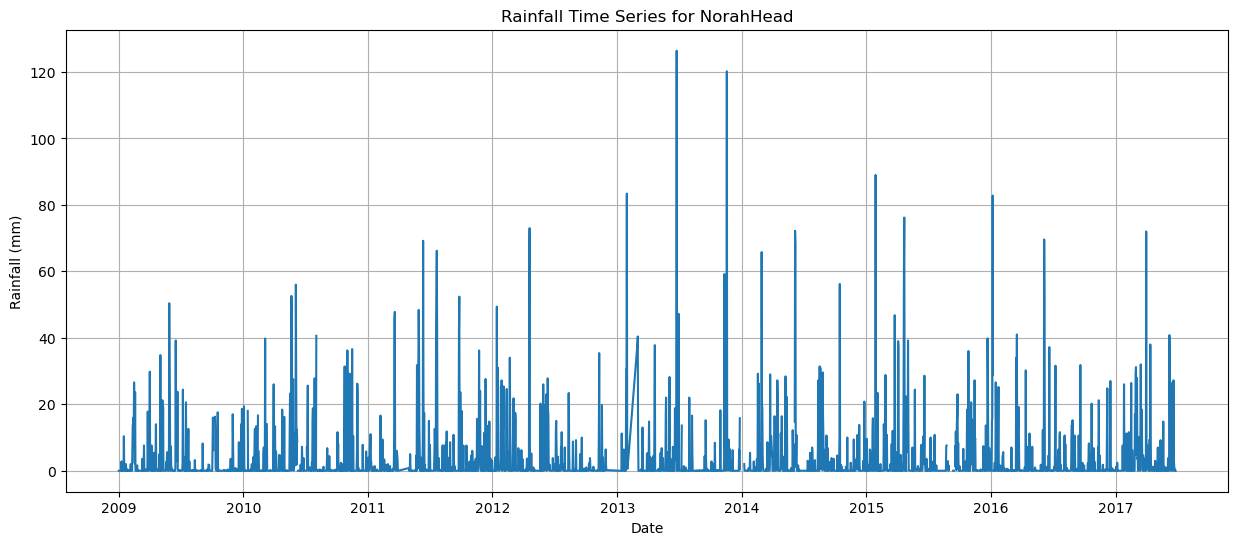

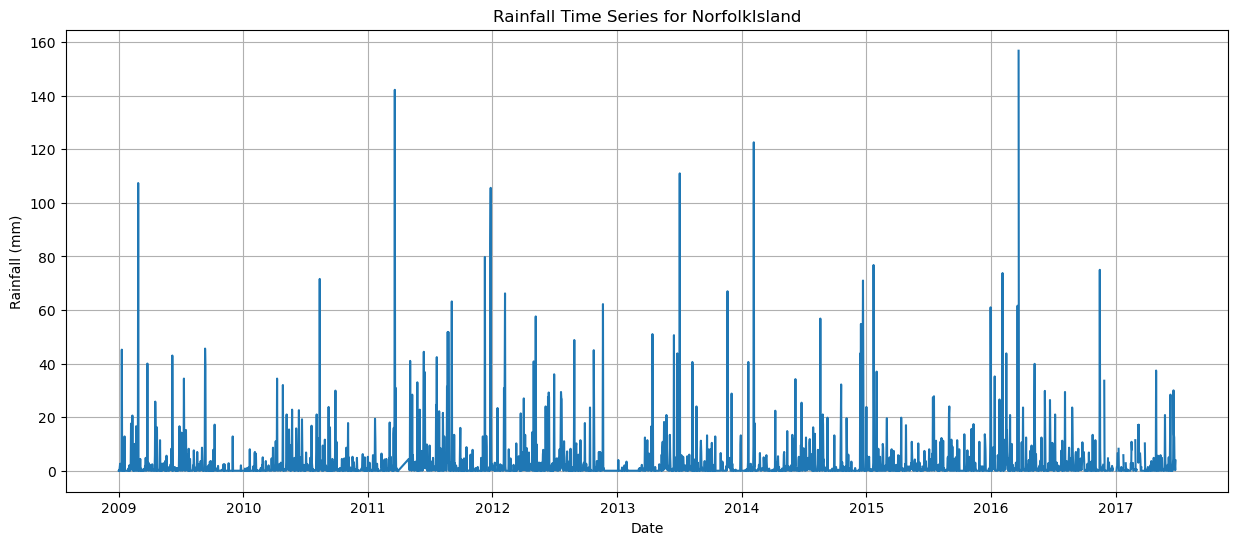

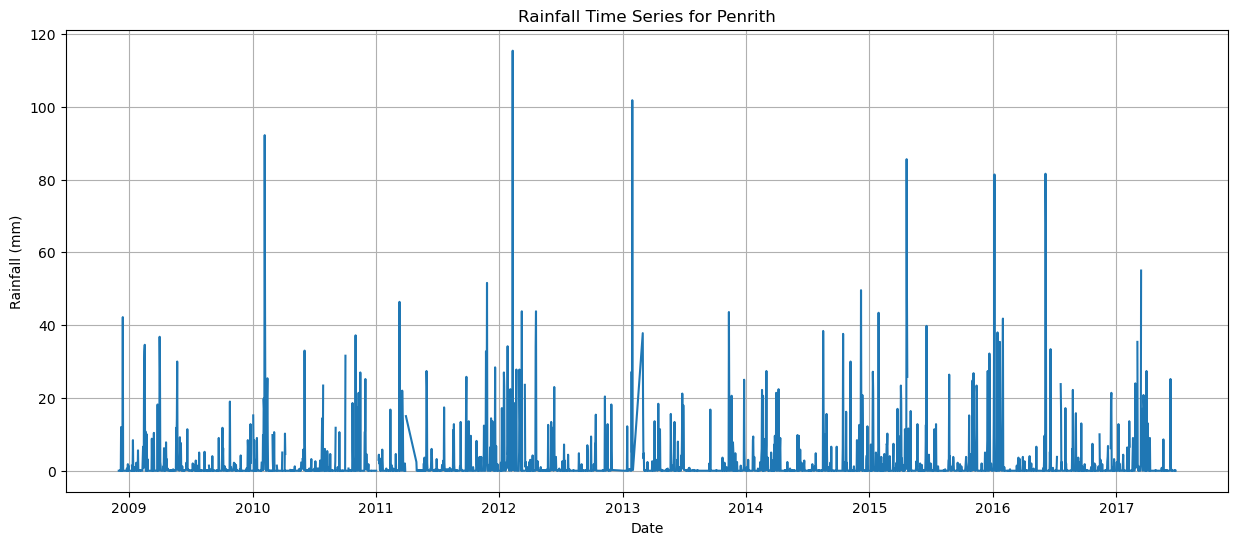

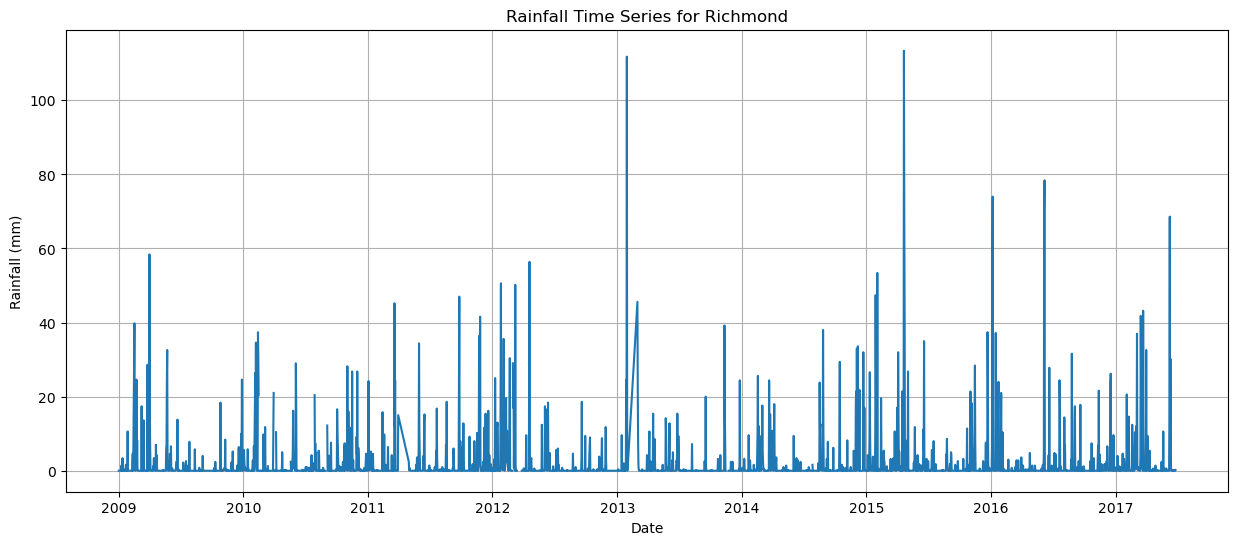

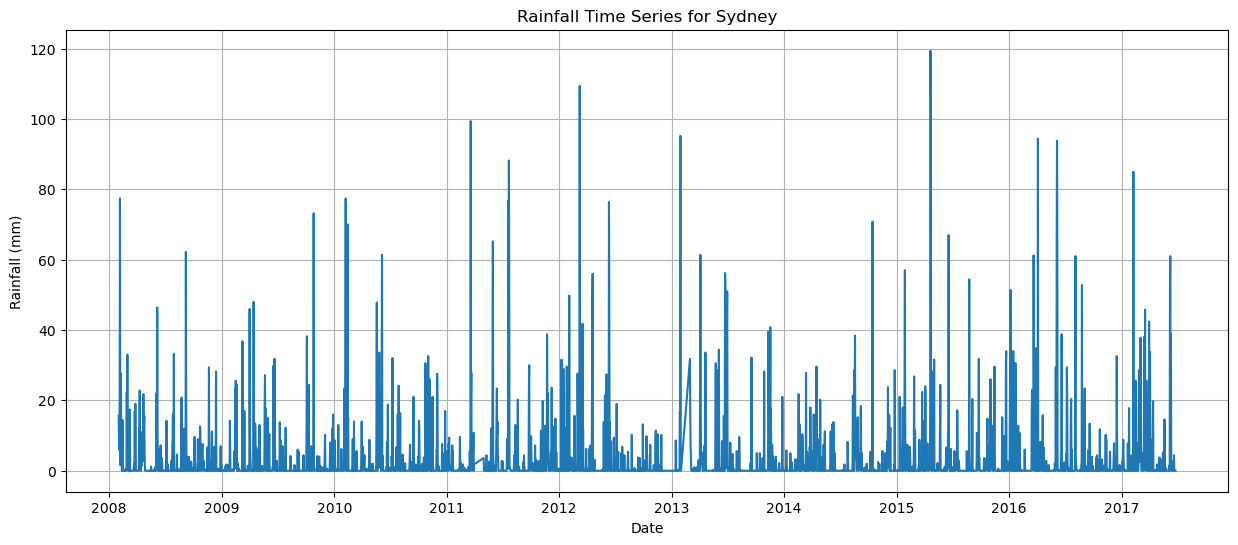

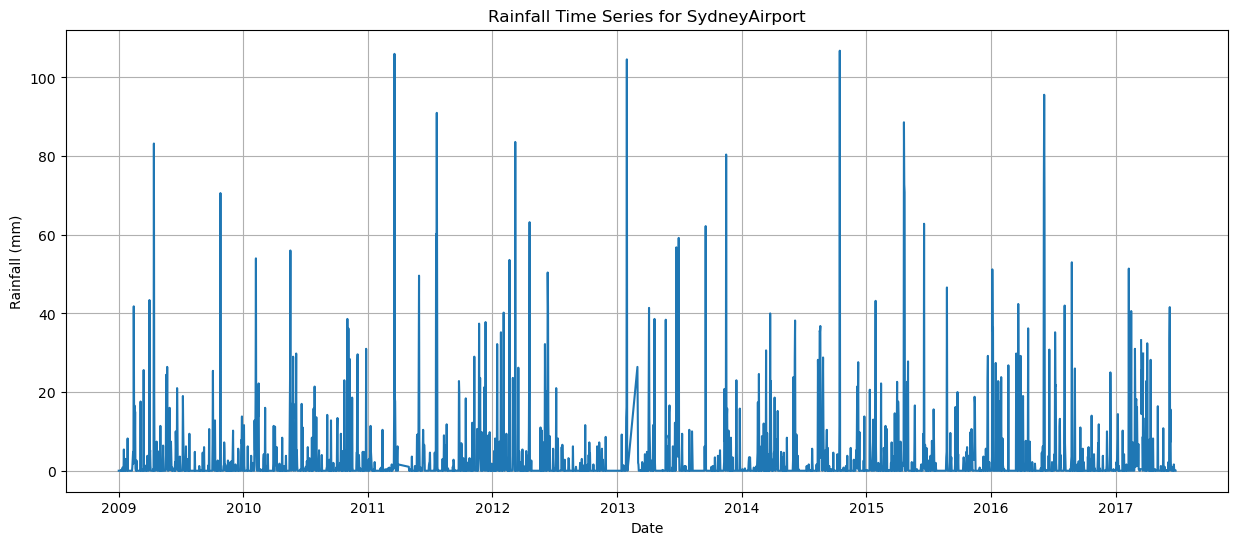

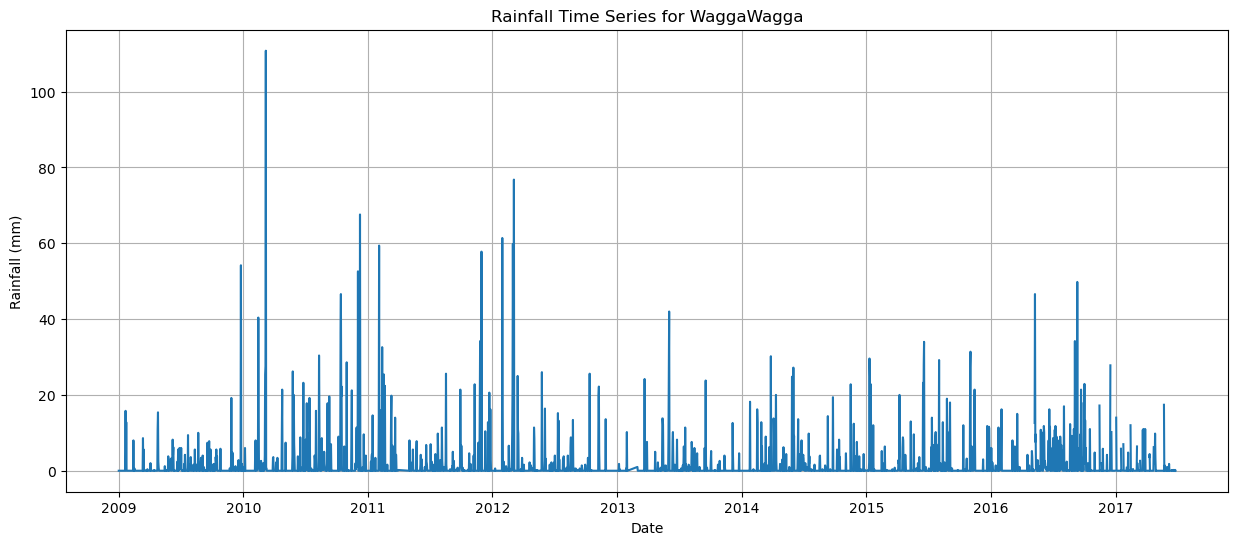

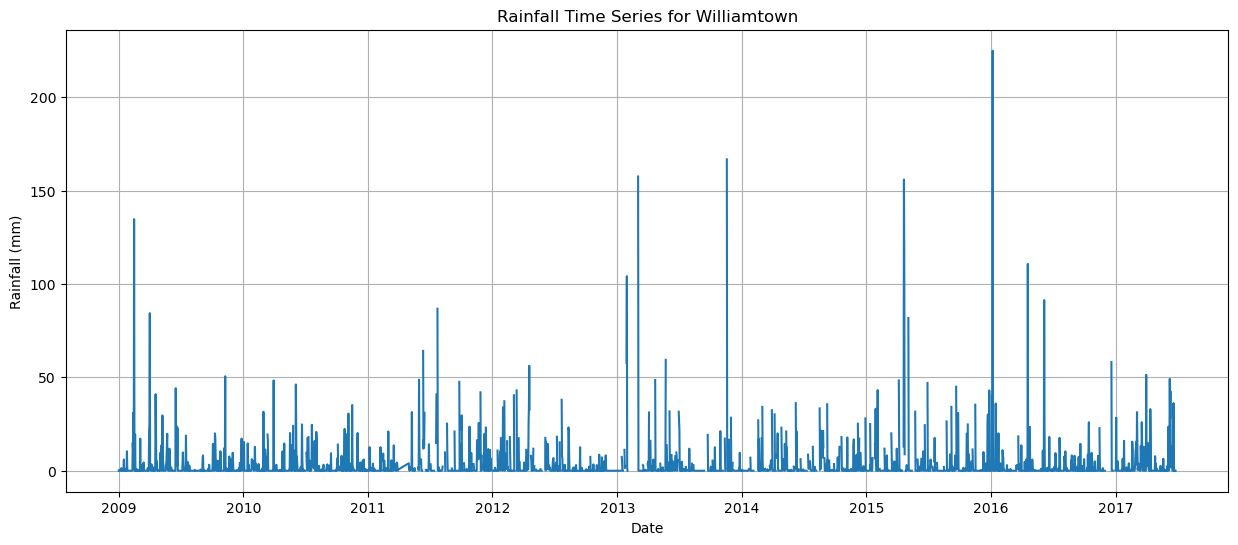

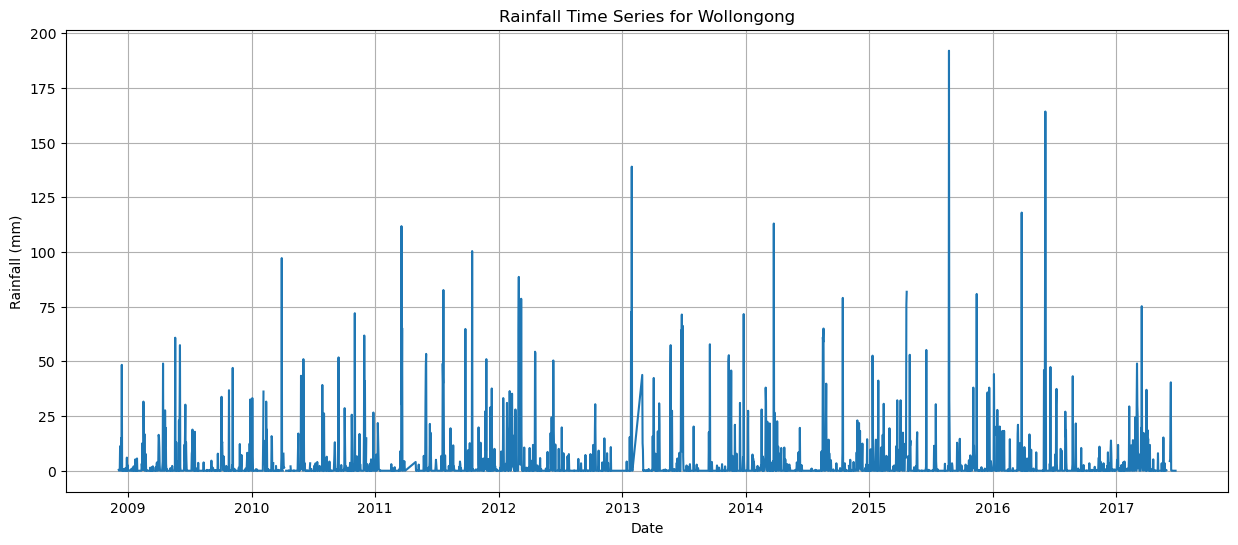

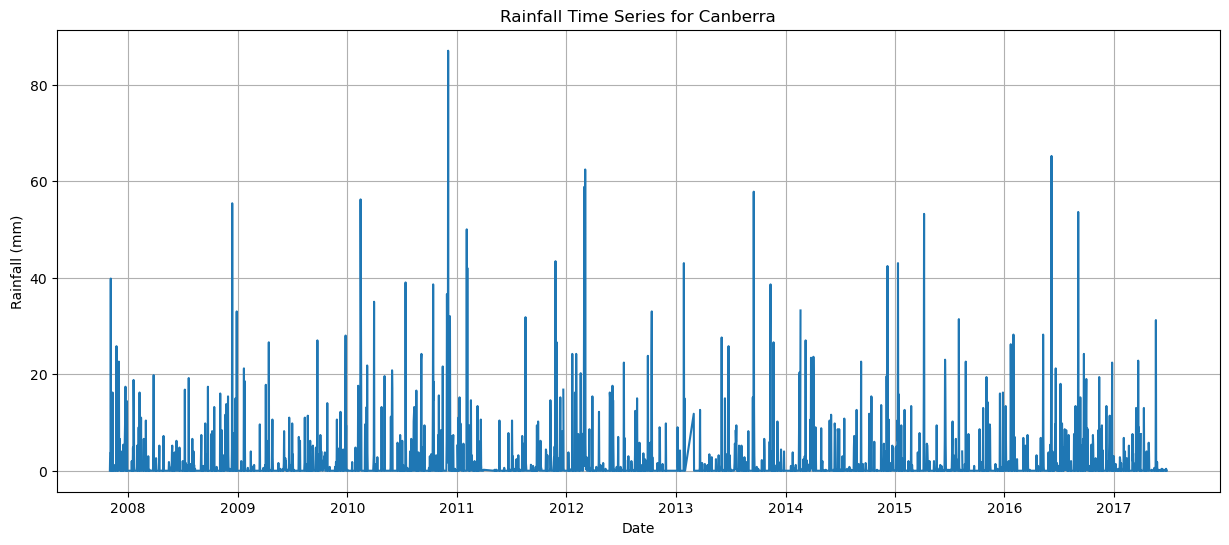

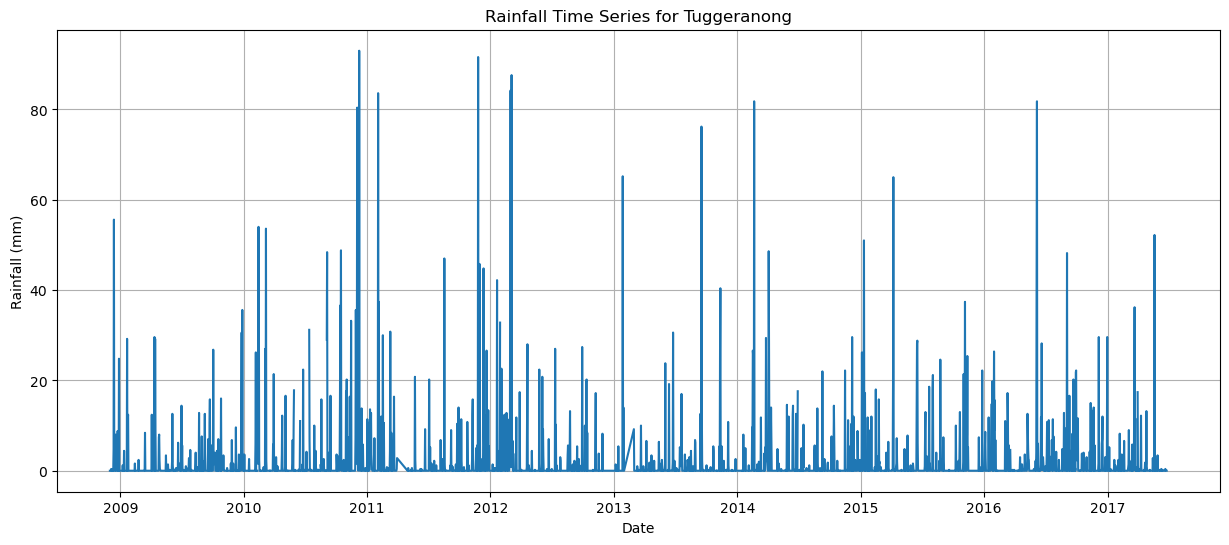

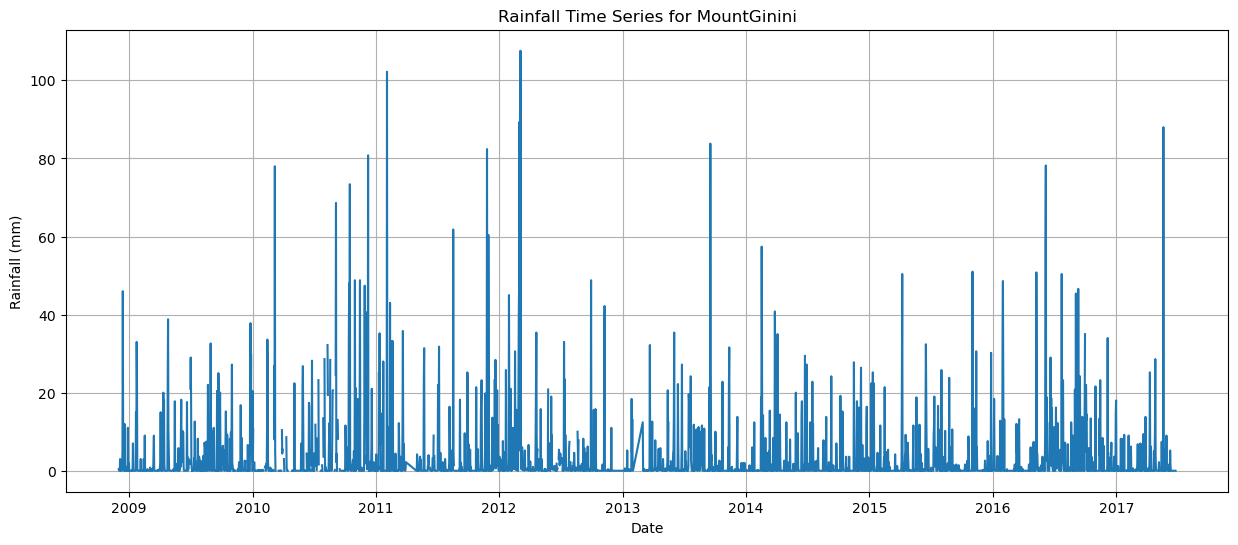

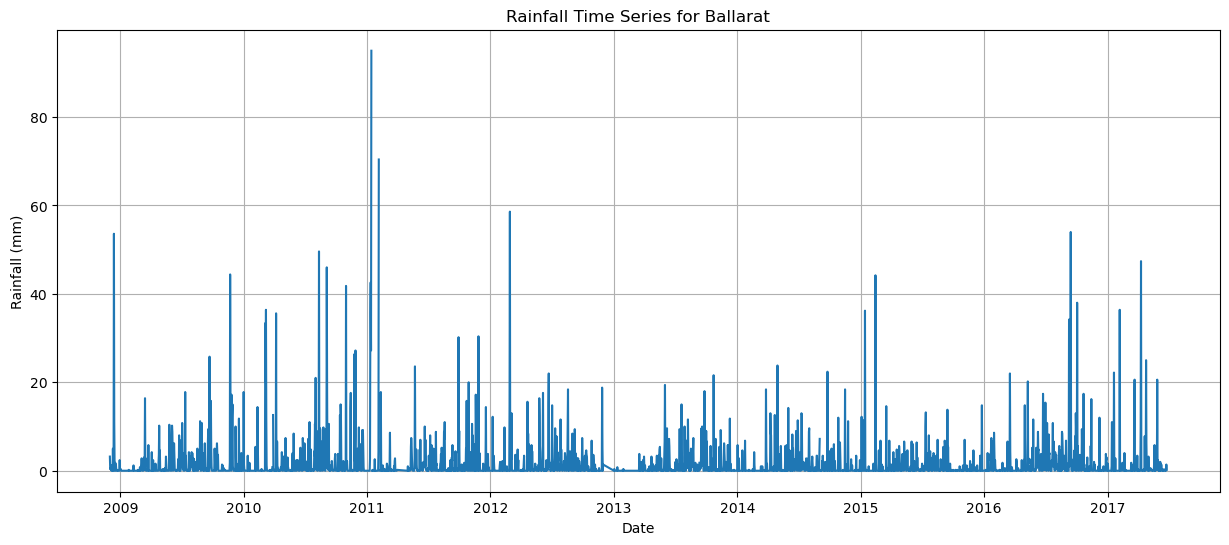

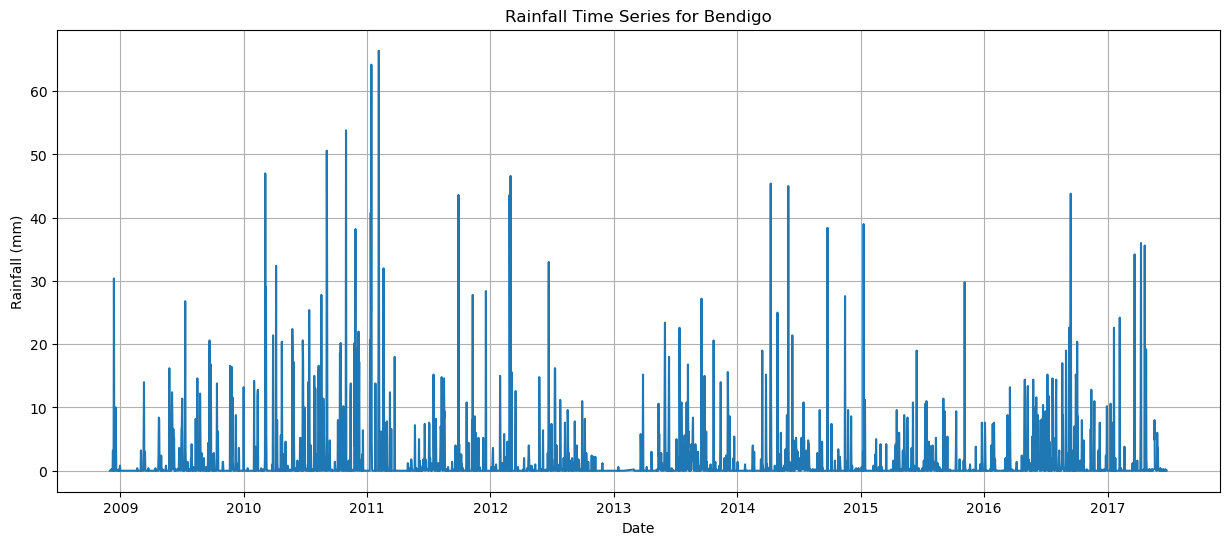

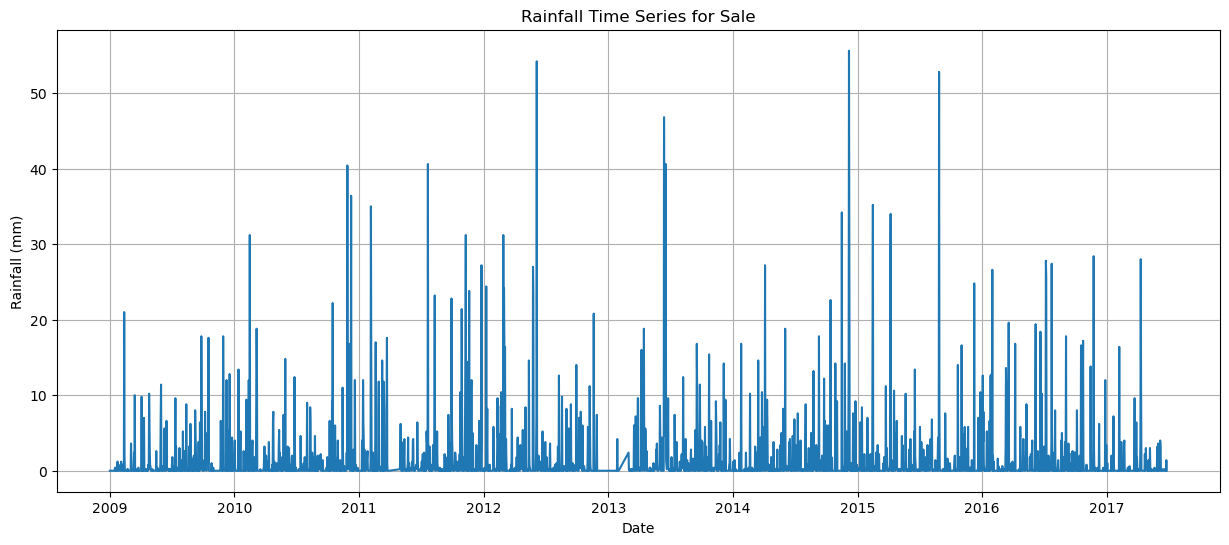

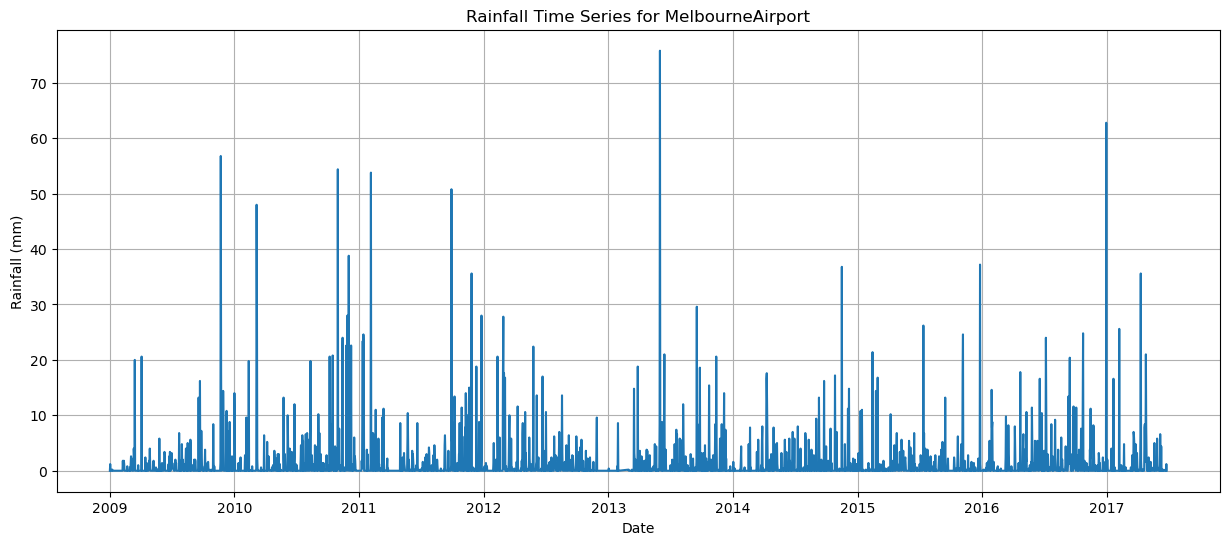

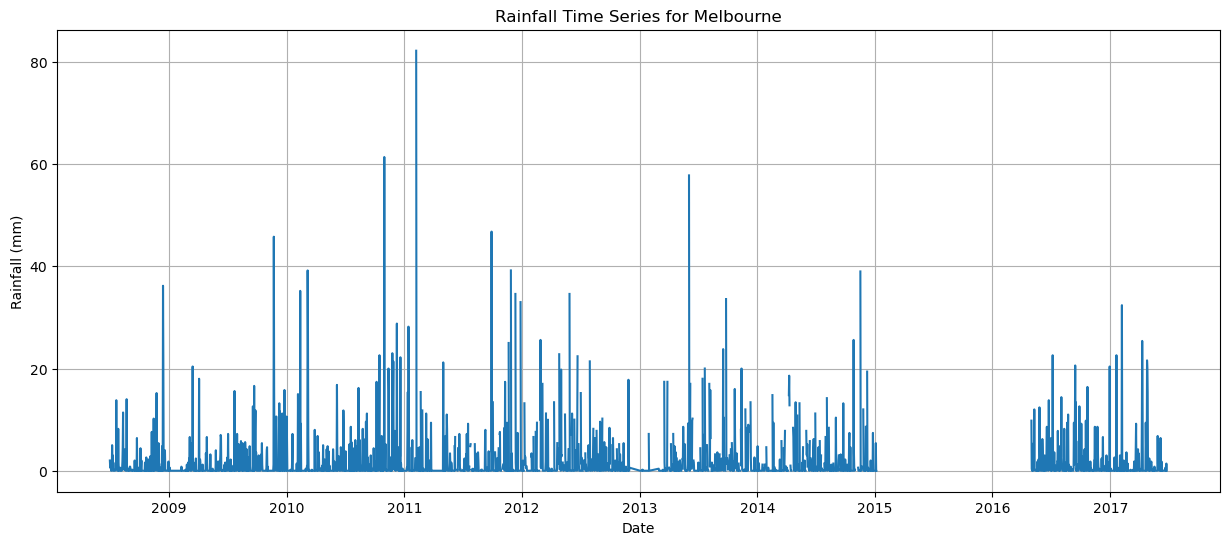

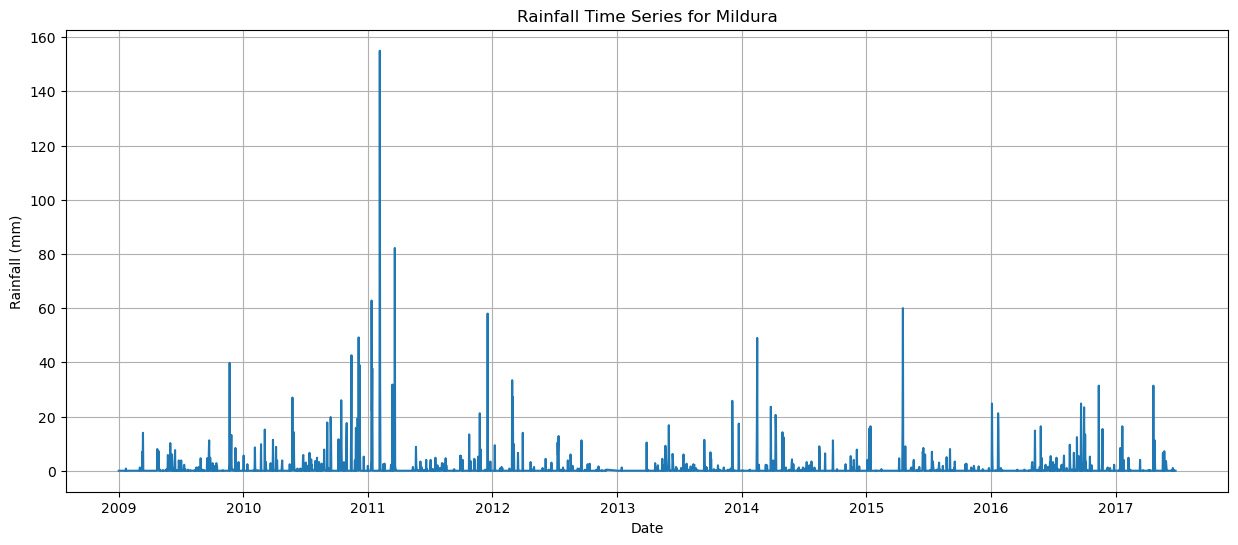

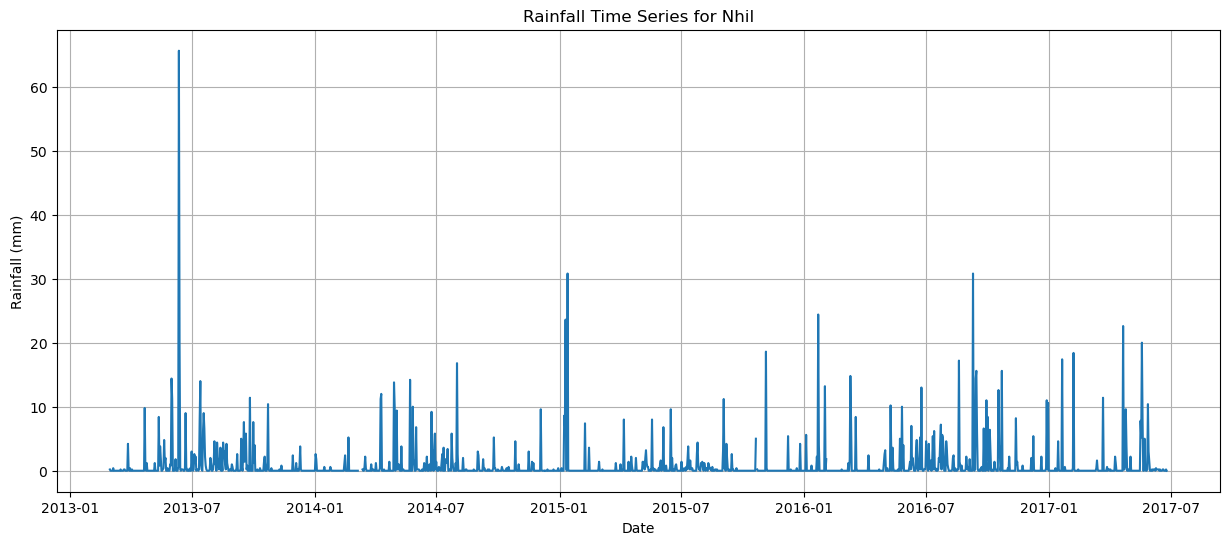

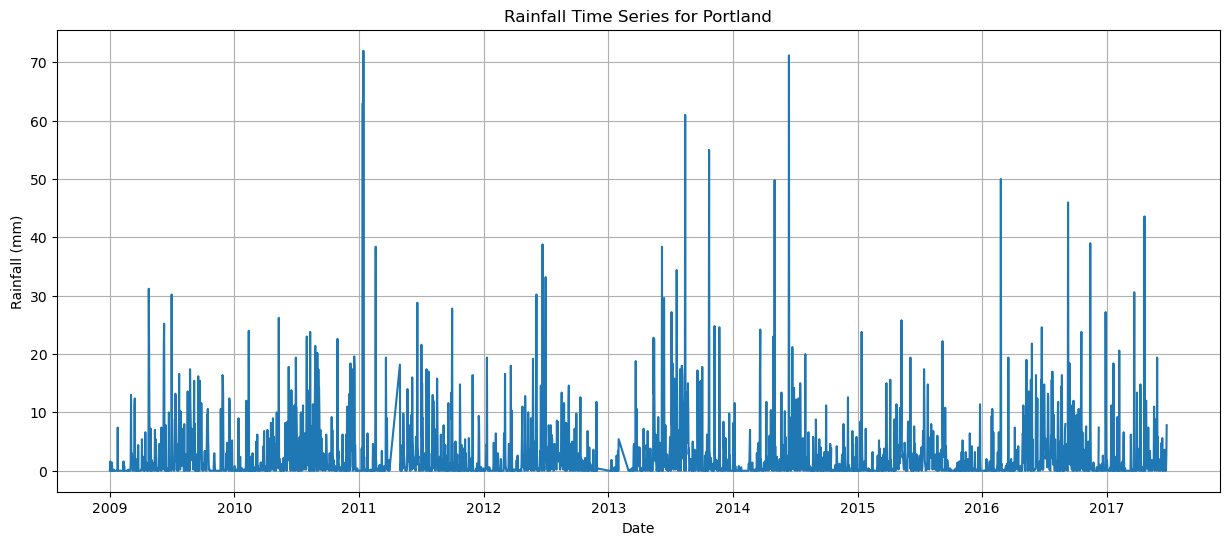

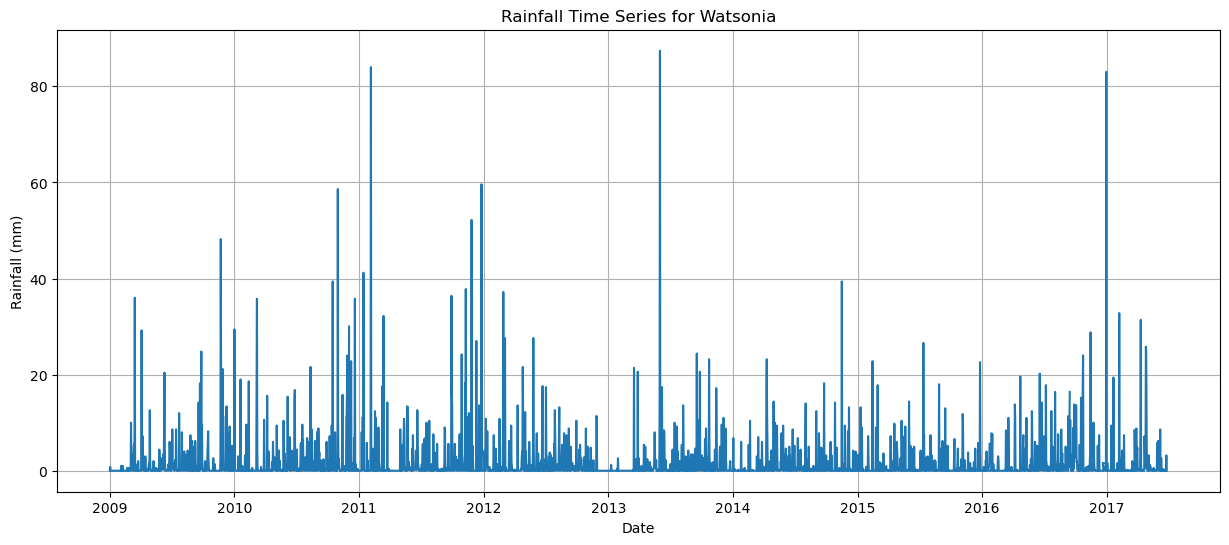

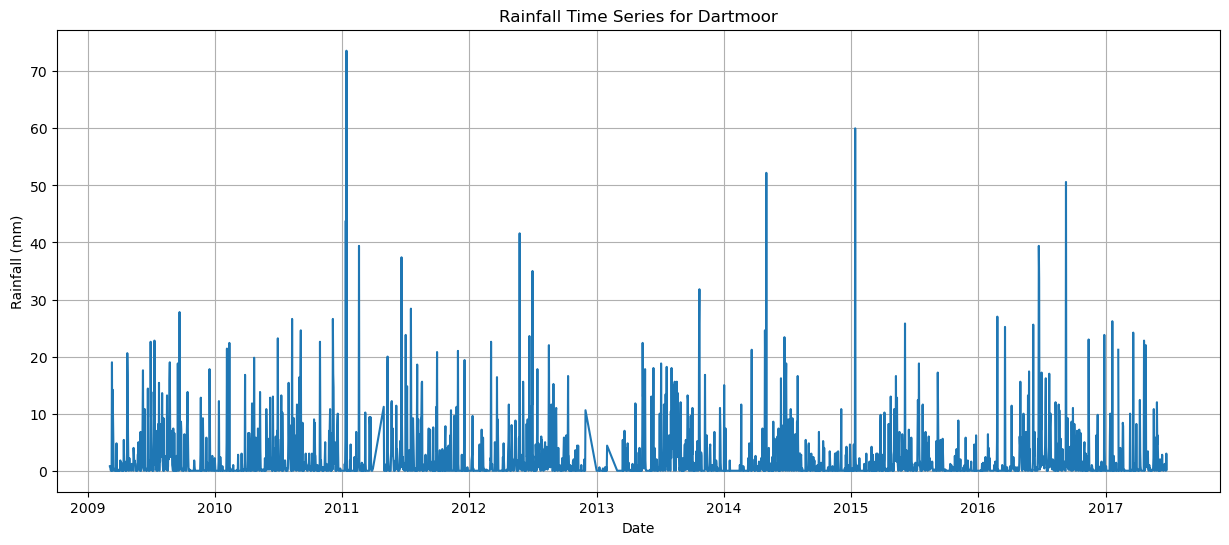

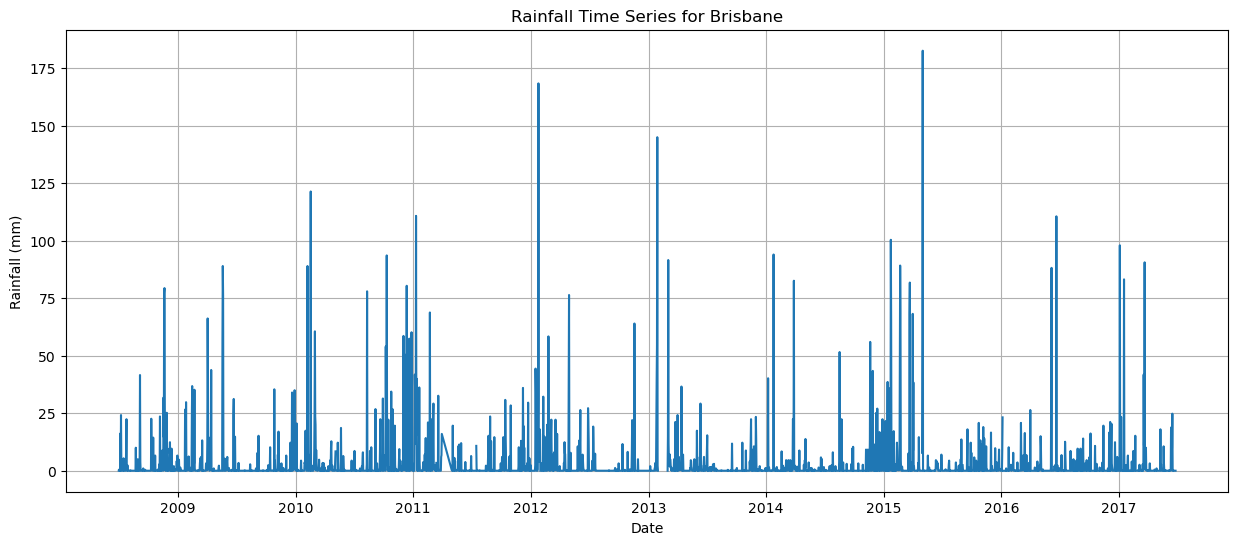

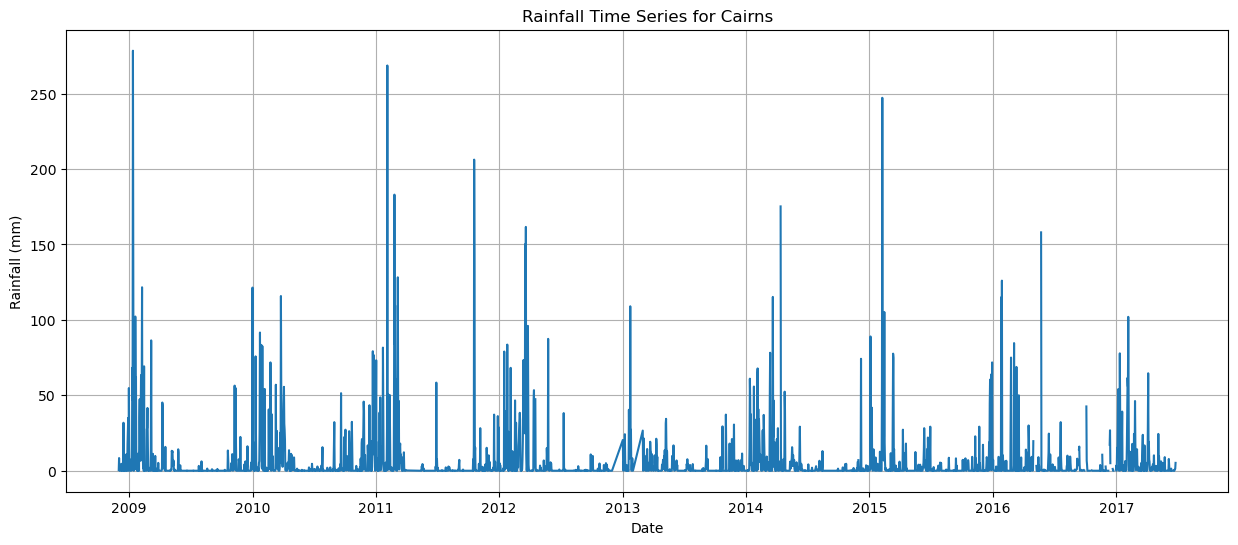

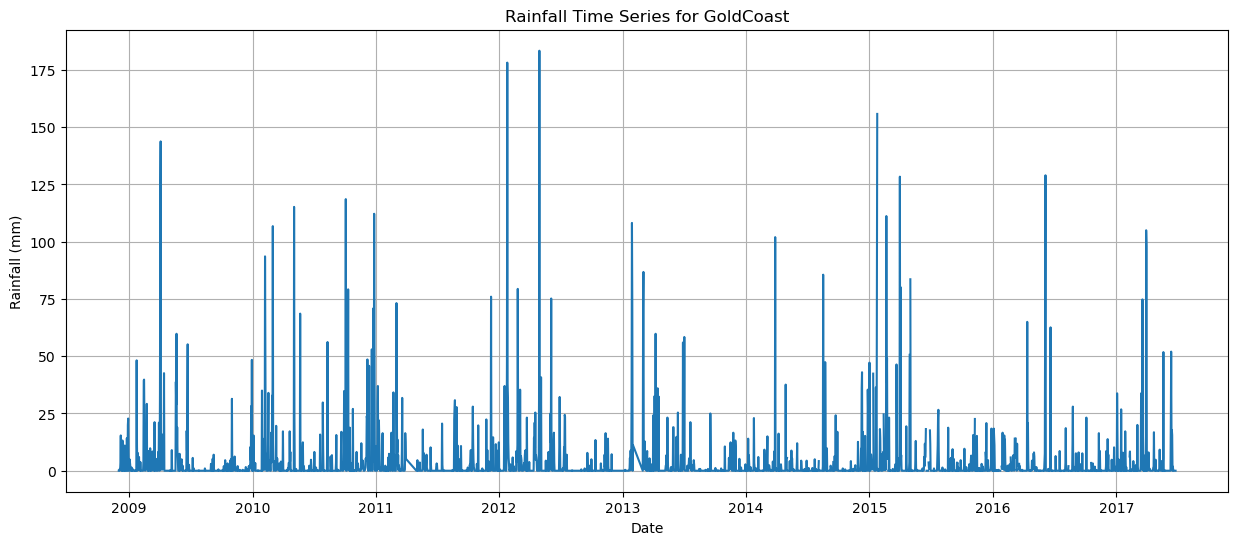

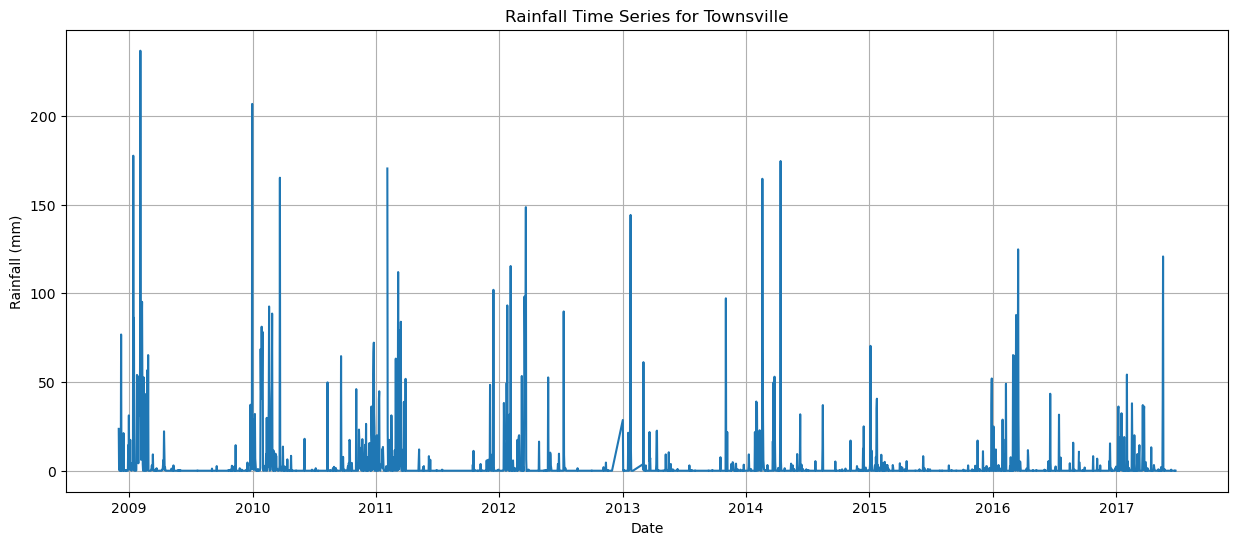

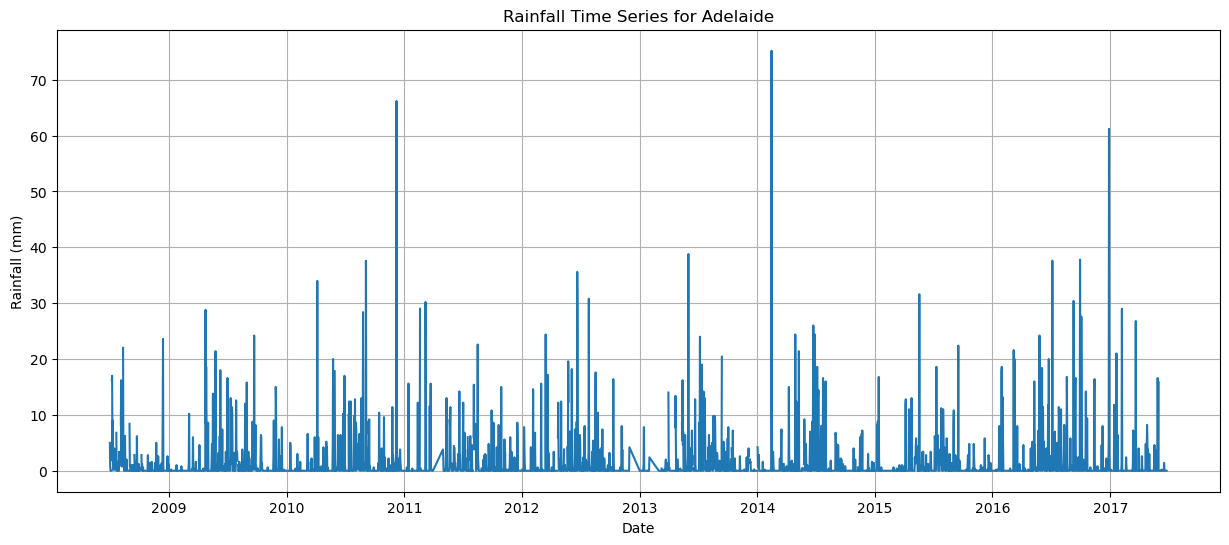

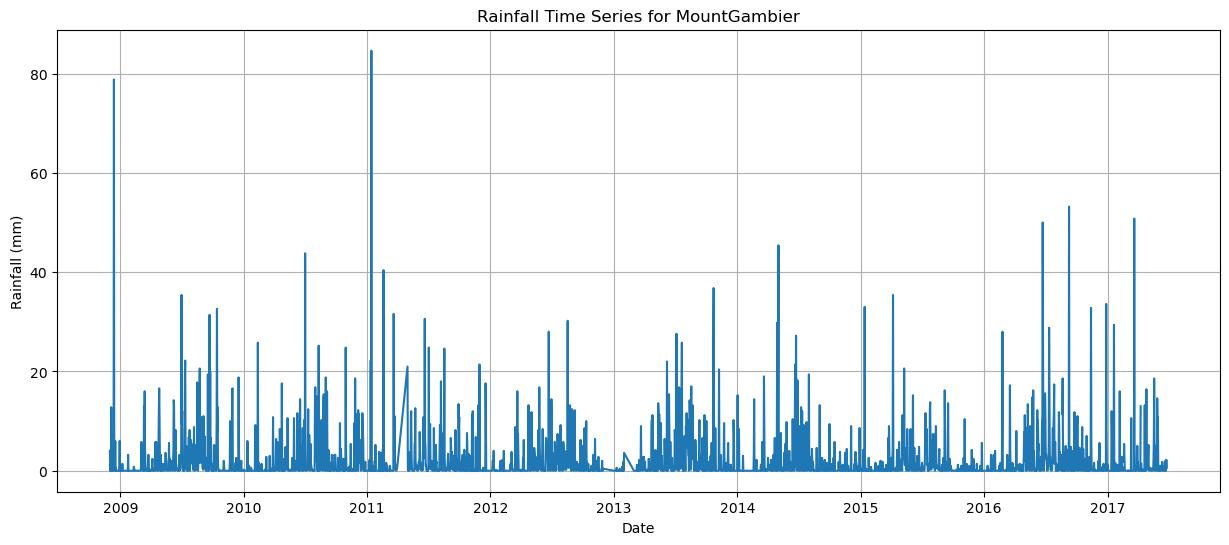

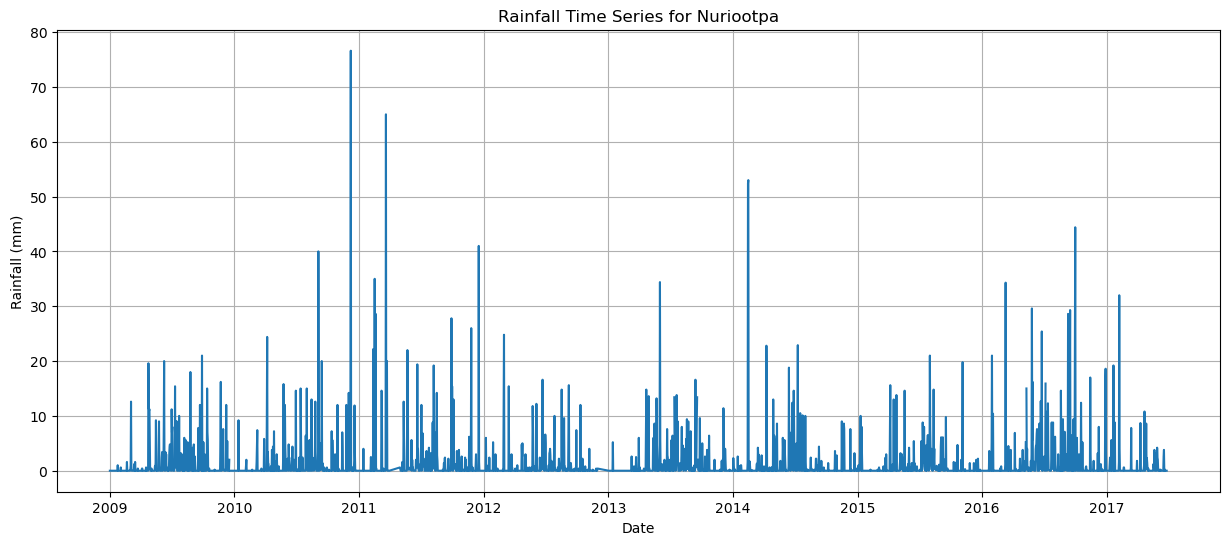

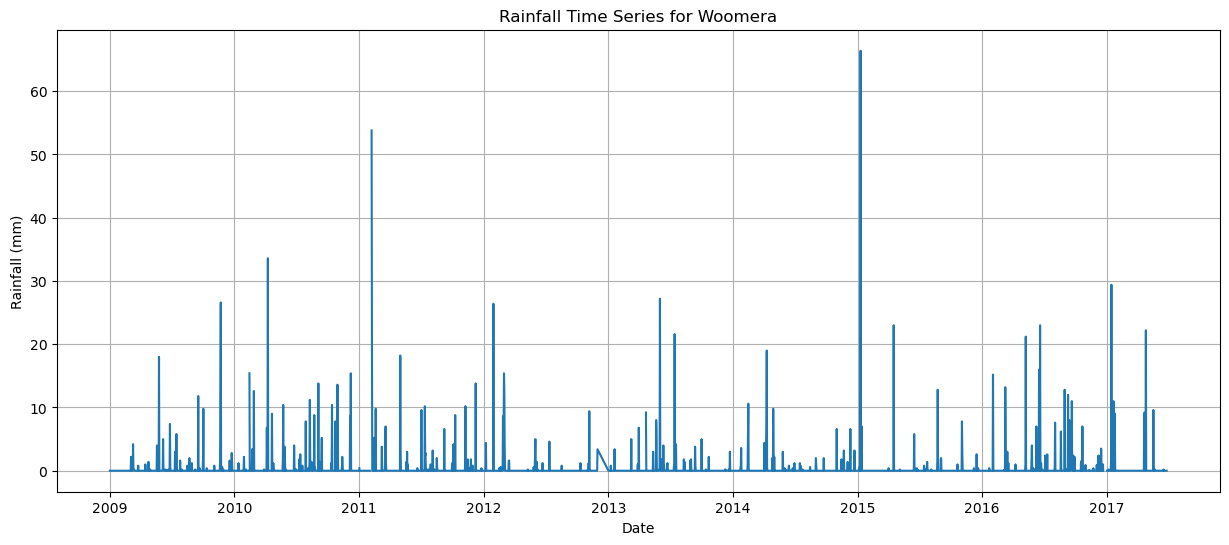

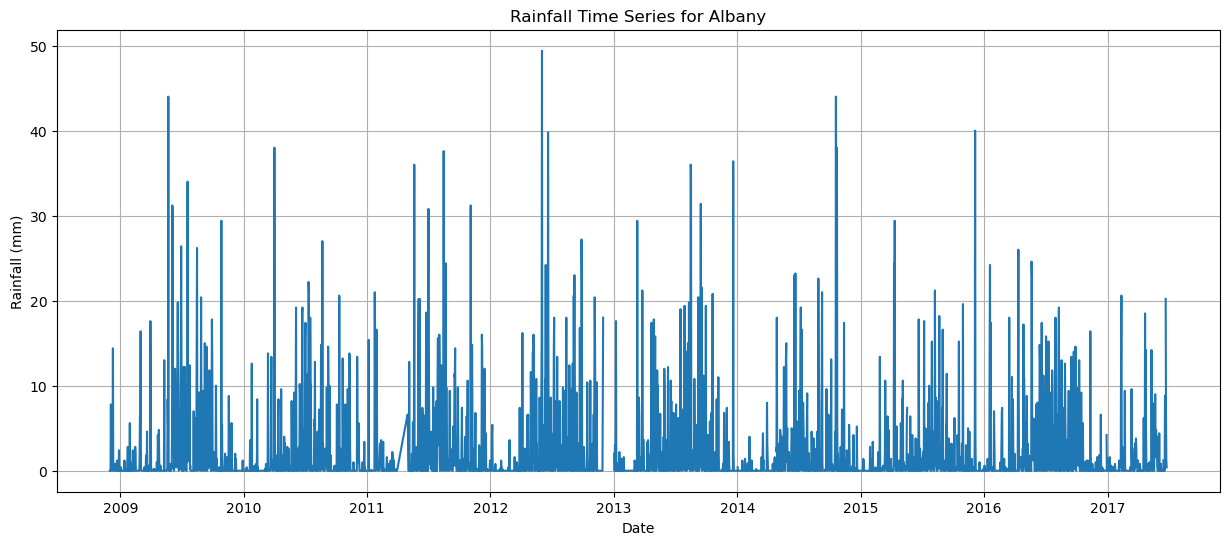

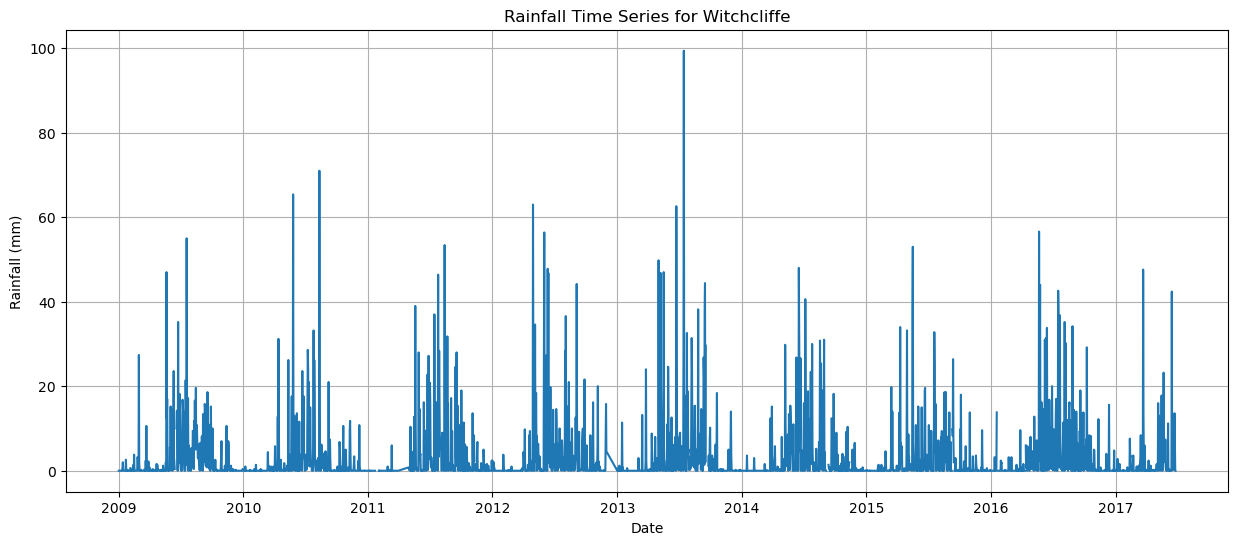

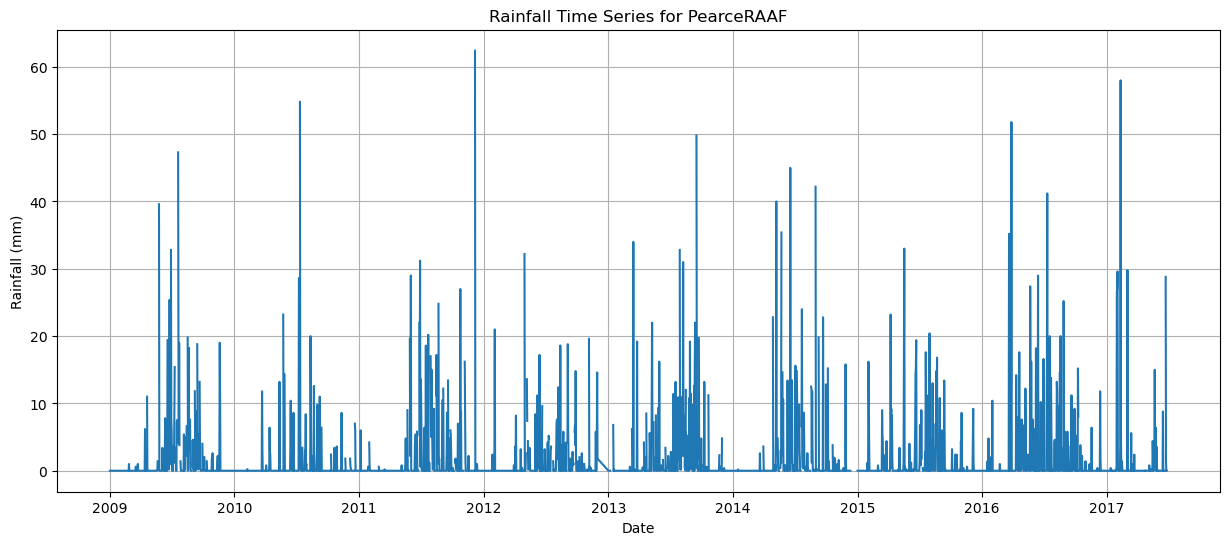

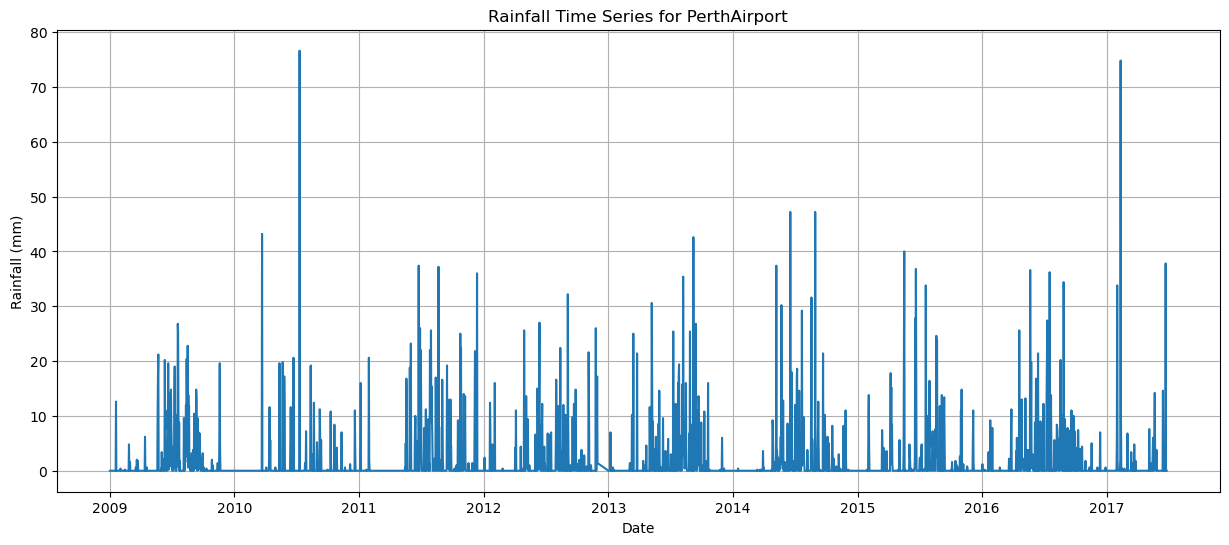

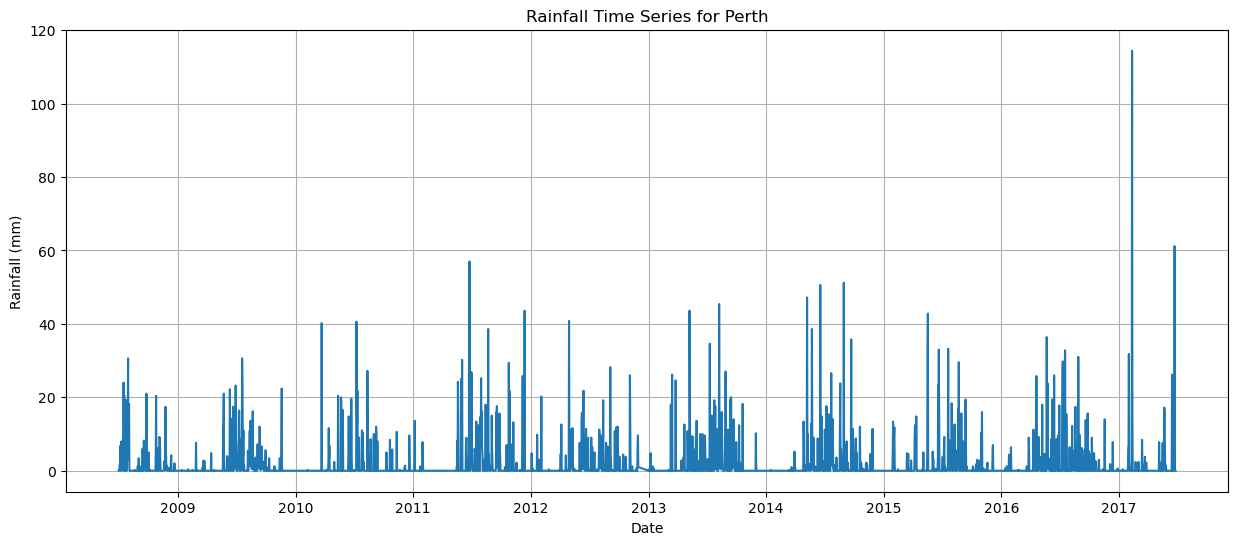

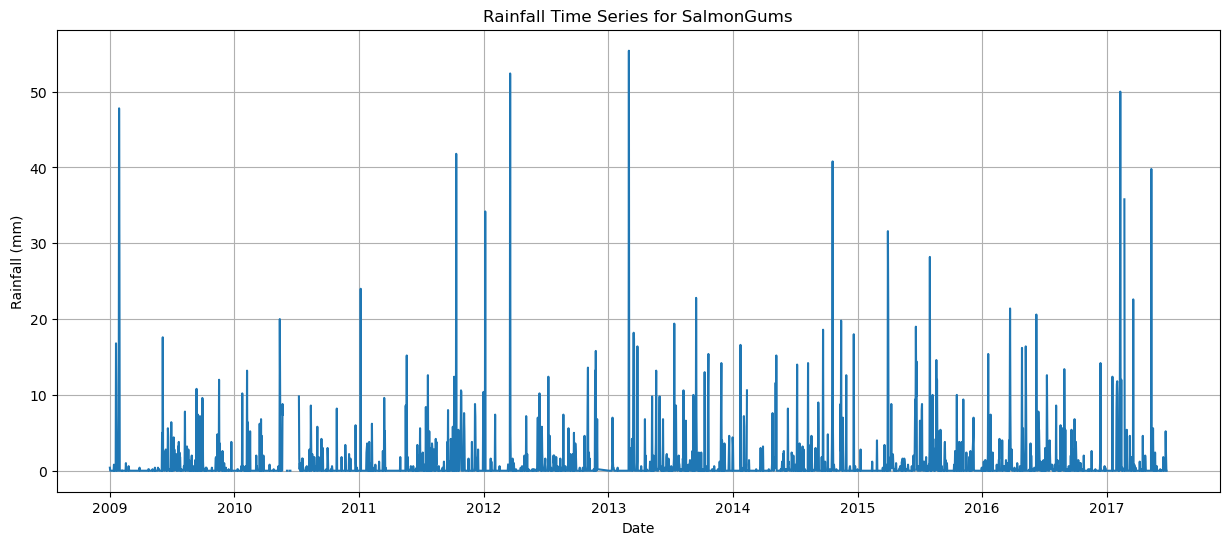

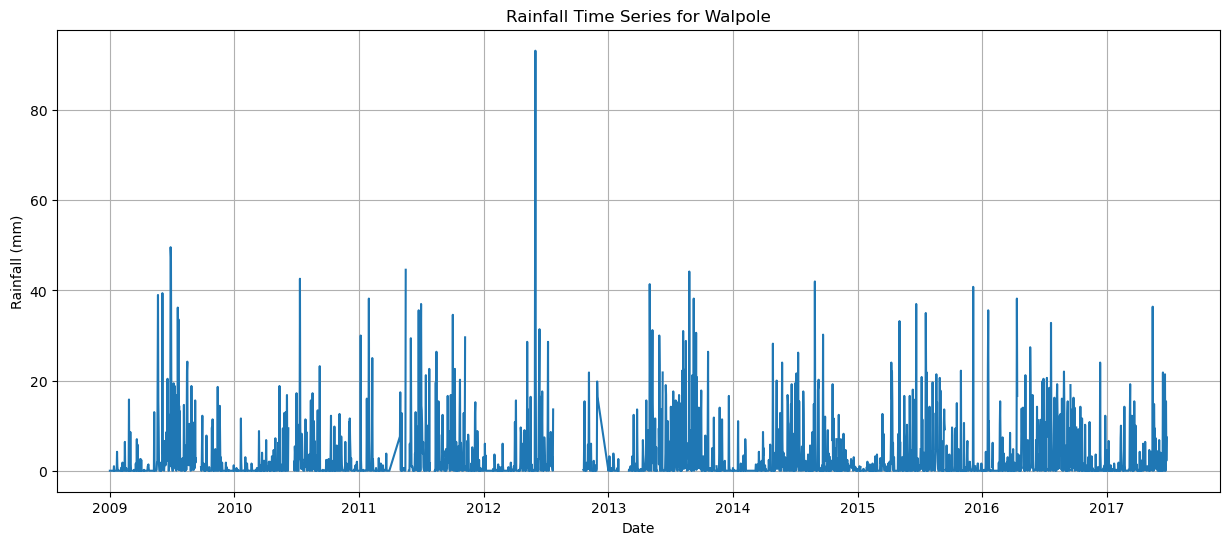

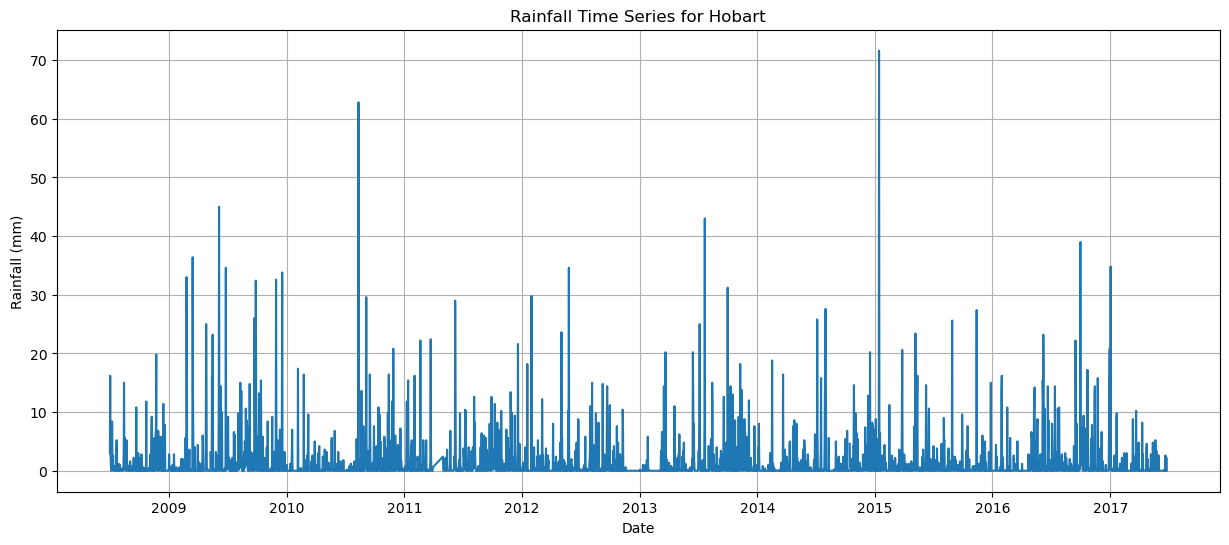

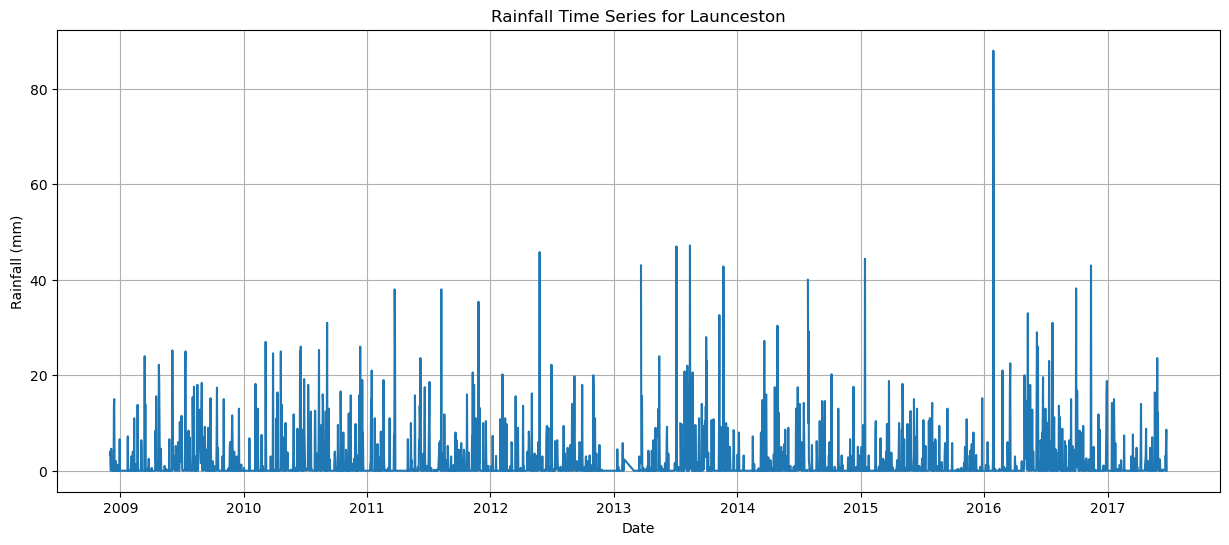

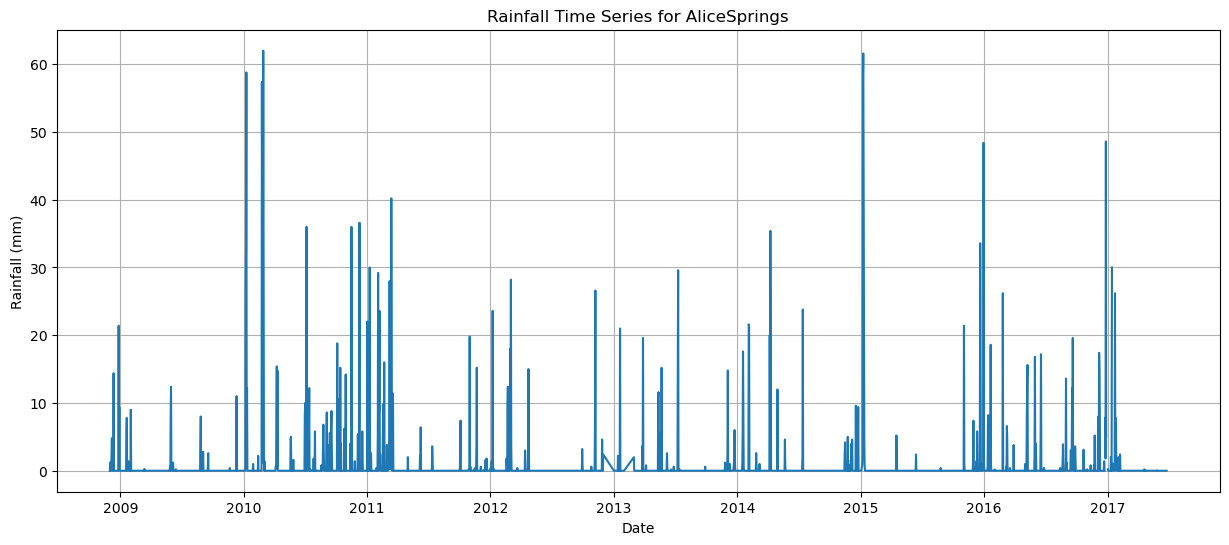

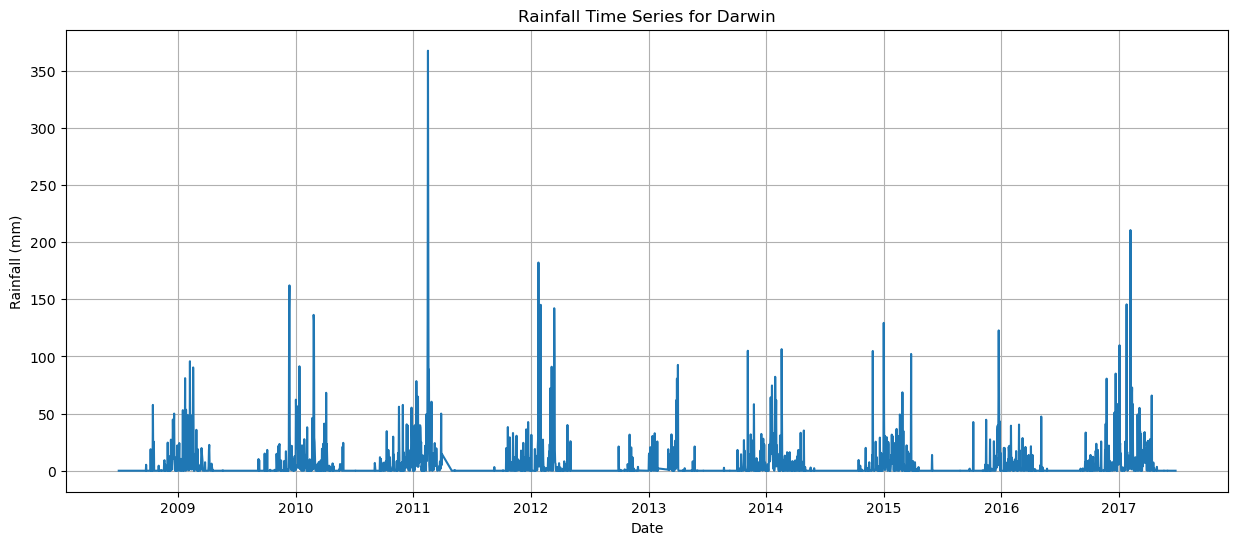

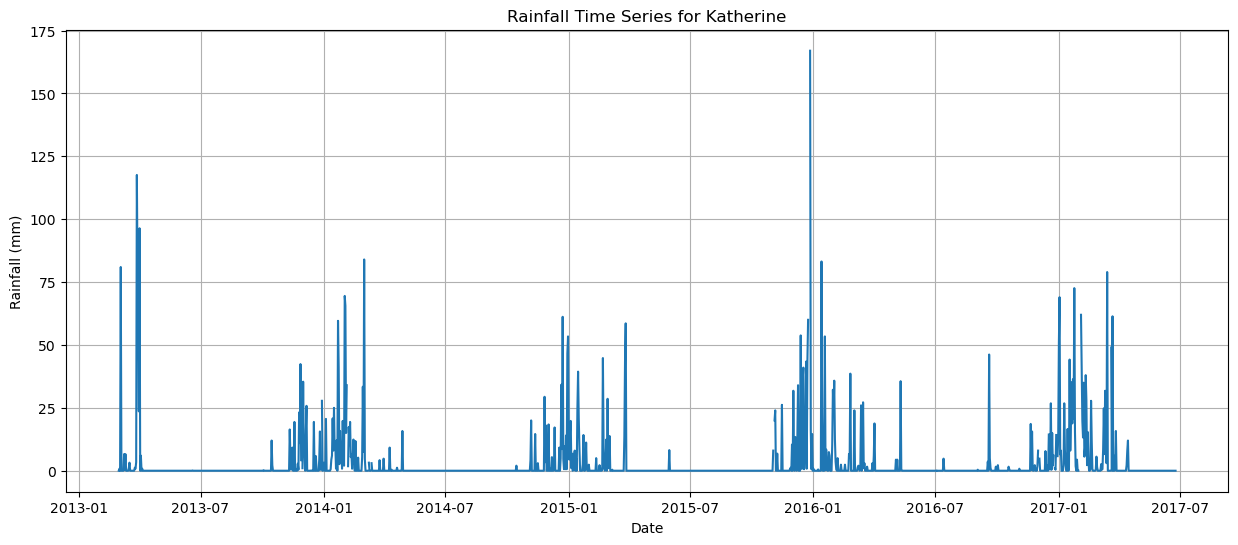

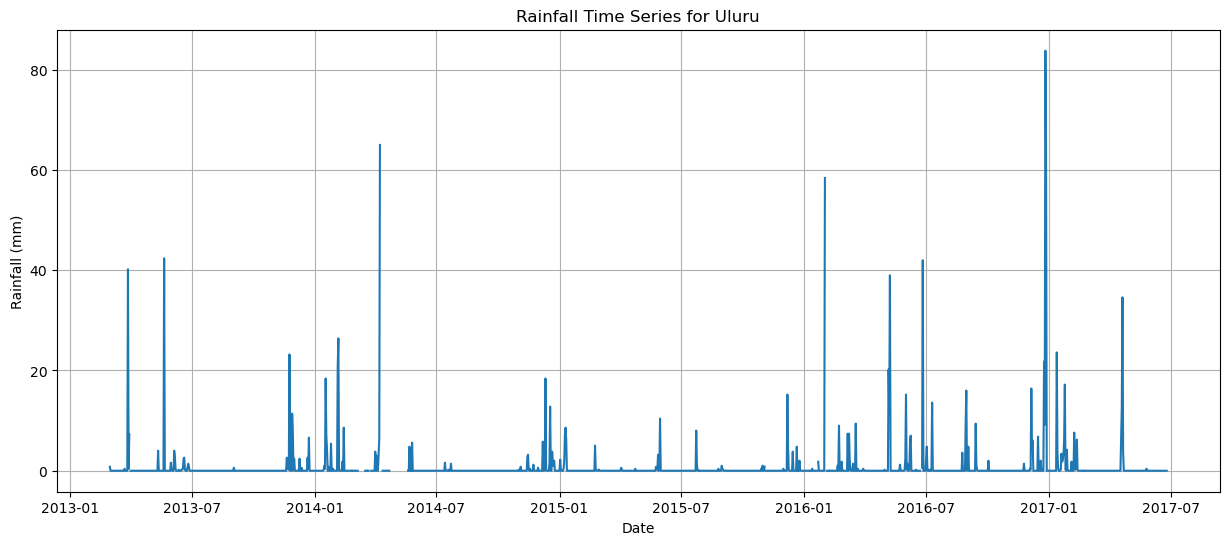

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data'
regions = data['Location'].unique()

# Plotting rainfall for each region
for region in regions:
    region_data = data[data['Location'] == region]
    
    # Plotting
    plt.figure(figsize=(15, 6))
    plt.plot(pd.to_datetime(region_data['Date']), region_data['Rainfall'])
    plt.title(f'Rainfall Time Series for {region}')
    plt.xlabel('Date')
    plt.ylabel('Rainfall (mm)')
    plt.grid(True)
    plt.show()


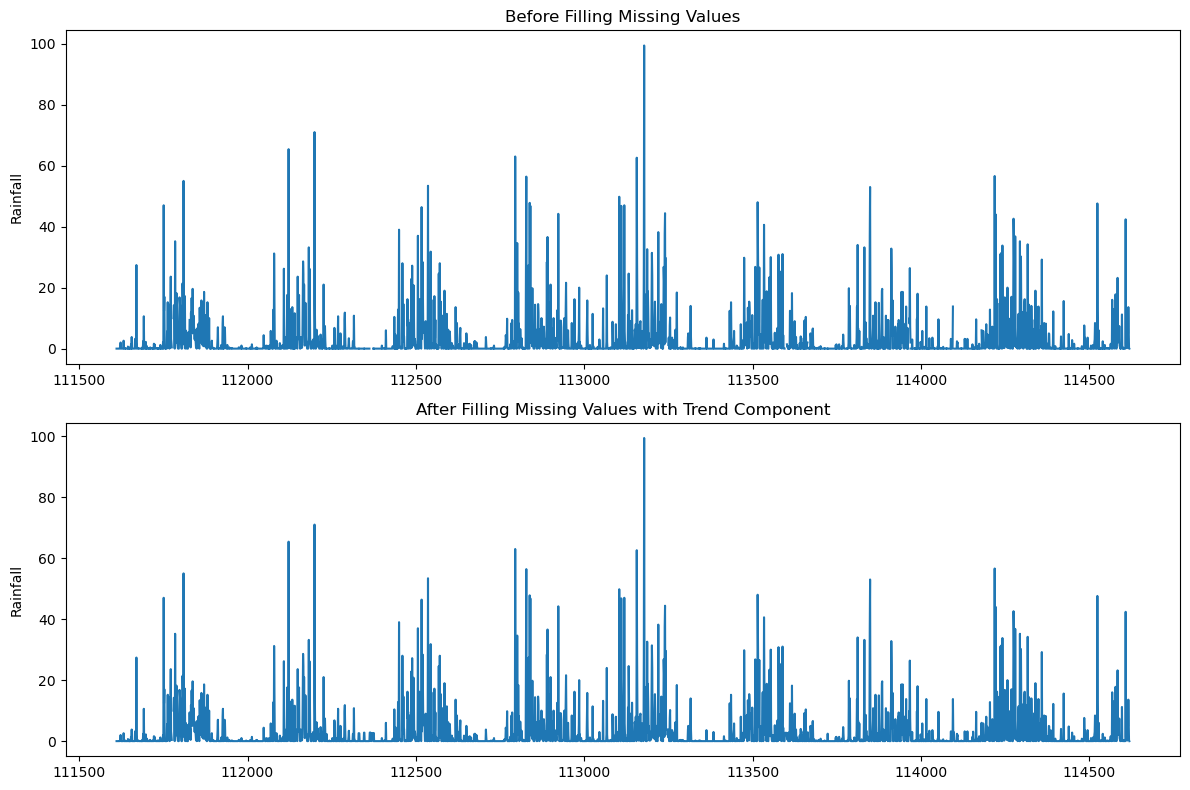

In [158]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['Rainfall'].interpolate(method='linear'), period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Fill missing values using the trend component
df_filled = df.copy()
df_filled['Rainfall'].fillna(trend, inplace=True)

# Plot before and after filling missing values
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Before filling missing values
df['Rainfall'].plot(ax=ax[0], title='Before Filling Missing Values', legend=False)
ax[0].set_ylabel('Rainfall')

# After filling missing values
df_filled['Rainfall'].plot(ax=ax[1], title='After Filling Missing Values with Trend Component', legend=False)
ax[1].set_ylabel('Rainfall')

plt.tight_layout()
plt.show()

In [159]:
missing_values = df_filled['Rainfall'].isna().sum()
print("Number of missing values:", missing_values)

Number of missing values: 6


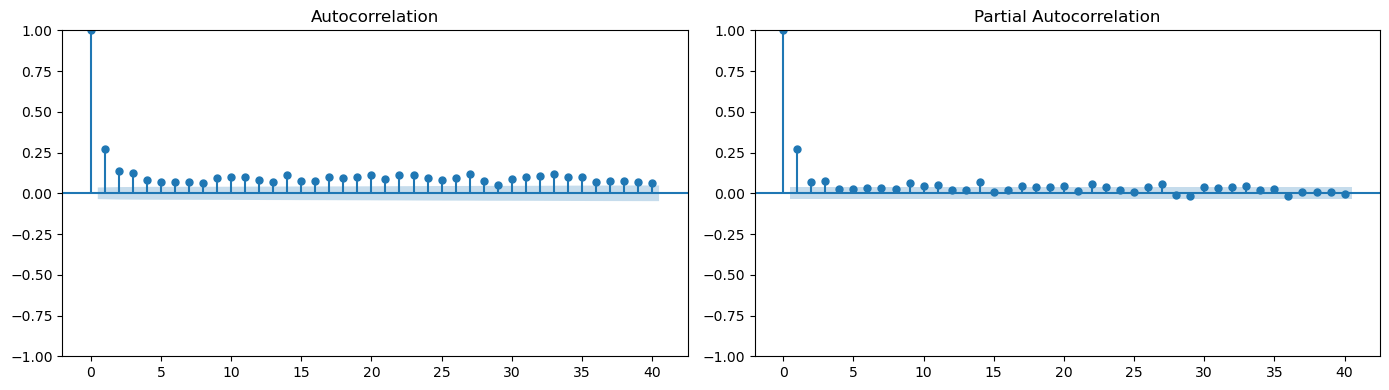

(-5.6939003231060665, 7.955137280139241e-07)

In [160]:
df_cleaned = df_filled.dropna(subset=['Rainfall'])

# Check for stationarity using Augmented Dickey-Fuller test
result = adfuller(df_cleaned['Rainfall'])
adf_statistic = result[0]
p_value = result[1]

# Plot ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(df_cleaned['Rainfall'], ax=ax[0], lags=40)
plot_pacf(df_cleaned['Rainfall'], ax=ax[1], lags=40)
plt.tight_layout()
plt.show()

adf_statistic, p_value


In [161]:
# Define the SARIMAX model
model = SARIMAX(df_filled['Rainfall'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))

# Fit the model
results = model.fit(disp=-1)

# Display the summary of the model
results.summary()


C:\Users\ayodh\anaconda3\envs\three-nine\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ayodh\anaconda3\envs\three-nine\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Rainfall   No. Observations:                 3009
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood              -10103.329
Date:                            Fri, 15 Sep 2023   AIC                          20216.658
Time:                                    15:53:06   BIC                          20246.705
Sample:                                         0   HQIC                         20227.464
                                           - 3009                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9907      0.003    293.727      0.000       0.984       0.997
ma.L1         -0.9371      0.007   -125.219      0.000      -0.952      -0.922
ar.S.L12       0.9982      0.009    116.066      0.000       0.981       1.015
ma.S.L12      -0.9951      0.015    -68.586      0.000      -1.024      -0.967
sigma2        48.9291      0.506     96.619      0.000      47.937      49.922
===================================================================================
Ljung-Box (L1) (Q):                  82.76   Jarque-Bera (JB):            140665.65
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             4.65
Prob(H) (two-sided):                  0.03   Kurtosis:                        35.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [162]:
# Resample the dataset to monthly frequency
df_monthly = df_filled.resample('M').sum()

# Check for stationarity using Augmented Dickey-Fuller test
result_monthly = adfuller(df_monthly['Rainfall'])
adf_statistic_monthly = result_monthly[0]
p_value_monthly = result_monthly[1]

# Plot ACF and PACF for the monthly resampled data
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(df_monthly['Rainfall'].dropna(), ax=ax[0], lags=24)
plot_pacf(df_monthly['Rainfall'].dropna(), ax=ax[1], lags=24)
plt.tight_layout()
plt.show()

adf_statistic_monthly, p_value_monthly

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [ ]:
# # Perform Augmented Dickey-Fuller test
# result = adfuller(df_monthly['Rainfall'])
# print("ADF Test Results:")
# print(f'ADF Statistic: {result[0]}')
# print(f'p-value: {result[1]}')
# print('Critical Values:')
# for key, value in result[4].items():
#     print(f'   {key}: {value}')

# # Check p-value against significance level (e.g., 0.05)
# if result[1] <= 0.05:
#     print("Reject the null hypothesis. Data is stationary.")
# else:
#     print("Fail to reject the null hypothesis. Data is non-stationary.")

In [ ]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# # Define the SARIMAX model
# model = SARIMAX(df_monthly['Rainfall'], order=(3, 0, 10), seasonal_order=(3, 0, 10, 12))

# # Fit the model
# results = model.fit(disp=-1)

# # Display the summary of the model
# results.summary()

In [ ]:
# print(df_monthly.index.min())
# print(df_monthly.index.max())

In [ ]:
# import itertools
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# # Define the p, d, q parameters to take any value between 0 and 2
# p = d = q = range(0, 10)

# # Generate all different combinations of p, d, and q
# pdq = list(itertools.product(p, d, q))

# # Seasonal combinations
# seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

# lowest_aic = float('inf')
# best_params = None
# best_seasonal_params = None

# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod = SARIMAX(df_monthly['Rainfall'],
#                           order=param,
#                           seasonal_order=param_seasonal,
#                           enforce_stationarity=False,
#                           enforce_invertibility=False)
#             results = mod.fit()
#             if results.aic < lowest_aic:
#                 lowest_aic = results.aic
#                 best_params = param
#                 best_seasonal_params = param_seasonal
#         except:
#             continue

# print('Best SARIMA parameters:', best_params, best_seasonal_params)


In [163]:
df_filled.index.min(), df_filled.index.max()


(111611, 114619)

In [153]:
# Plot actual vs predicted values
fig, ax = plt.subplots(figsize=(14, 6))
df_monthly['Rainfall'].plot(label='Observed', ax=ax)
predicted_mean.plot(label='Predicted', ax=ax, alpha=0.7)
# ax.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='k', alpha=0.2)
ax.set_title('Actual vs Predicted Rainfall')
ax.set_xlabel('Date')
ax.set_ylabel('Rainfall')
ax.legend()
plt.tight_layout()
plt.show()

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [102]:
start_date = pd.to_datetime('1901-01-01')
end_date = pd.to_datetime('1950-12-31')

# Boolean indexing to remove the specified range
rainfall_data = rainfall_data[(rainfall_data.index < start_date) | (rainfall_data.index >= end_date)]

print(rainfall_data)

YEAR-MONTH
1951-01-01     82.7
1951-02-01      7.2
1951-04-01     45.4
1951-05-01    259.0
1951-06-01    619.9
              ...  
2015-08-01    480.0
2015-09-01    523.3
2015-10-01    252.1
2015-11-01    236.3
2015-12-01    129.9
Name: RAINFALL, Length: 767, dtype: float64


<AxesSubplot:xlabel='YEAR-MONTH'>

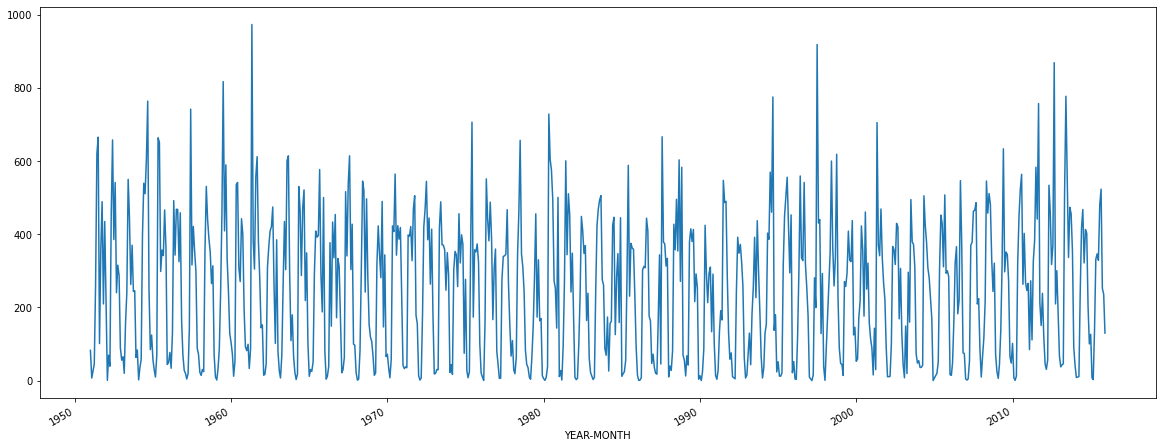

In [103]:
plt.figure(figsize=(20, 8)) 
rainfall_data.plot()

<AxesSubplot:xlabel='YEAR-MONTH'>

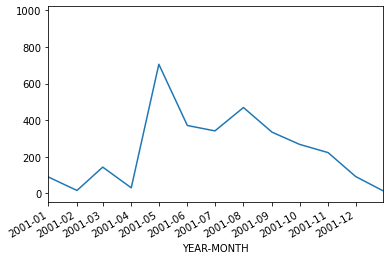

In [104]:
rainfall_data.plot(xlim=['2001-01-01','2001-12-31'])

<AxesSubplot:xlabel='YEAR-MONTH'>

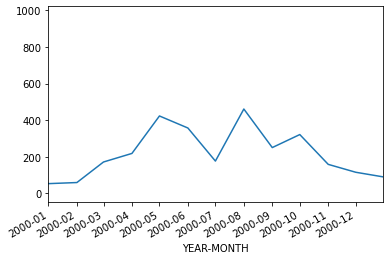

In [105]:
rainfall_data.plot(xlim=['2000-01-01','2000-12-31'])

In [106]:
rainfall_data.index

DatetimeIndex(['1951-01-01', '1951-02-01', '1951-04-01', '1951-05-01',
               '1951-06-01', '1951-07-01', '1951-08-01', '1951-09-01',
               '1951-10-01', '1951-11-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='YEAR-MONTH', length=767, freq=None)

In [107]:
## rule A year end frequency
rainfall_data_min_y = rainfall_data.resample(rule='A').min()
rainfall_data_min_y.head()

YEAR-MONTH
1951-12-31     7.2
1952-12-31     0.8
1953-12-31    20.1
1954-12-31     2.1
1955-12-31     9.9
Freq: A-DEC, Name: RAINFALL, dtype: float64

<AxesSubplot:xlabel='YEAR-MONTH'>

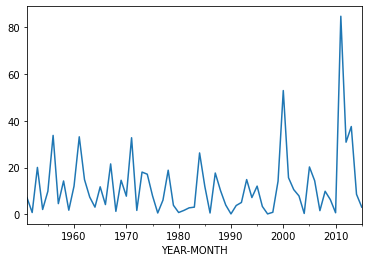

In [108]:
rainfall_data_min_y.plot()

In [109]:
## quartely start frequency
rainfall_data_min_q = rainfall_data.resample(rule='QS').min()
rainfall_data_min_q.head(5)

YEAR-MONTH
1951-01-01      7.2
1951-04-01     45.4
1951-07-01    101.3
1951-10-01    209.6
1952-01-01      0.8
Freq: QS-JAN, Name: RAINFALL, dtype: float64

<AxesSubplot:xlabel='YEAR-MONTH'>

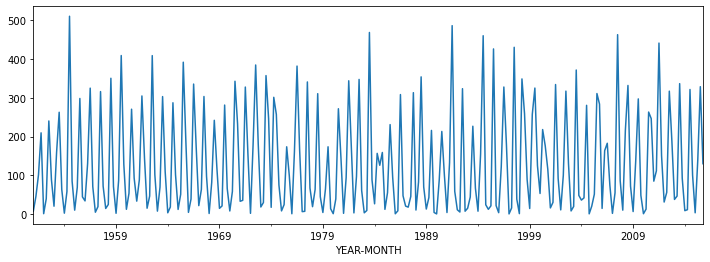

In [110]:
rainfall_data_min_q.plot(figsize=(12,4))

In [111]:
rainfall_data_max_y = rainfall_data.resample(rule='A').max()
rainfall_data_max_y.head()

YEAR-MONTH
1951-12-31    665.3
1952-12-31    657.7
1953-12-31    549.9
1954-12-31    763.8
1955-12-31    663.6
Freq: A-DEC, Name: RAINFALL, dtype: float64

<AxesSubplot:xlabel='YEAR-MONTH'>

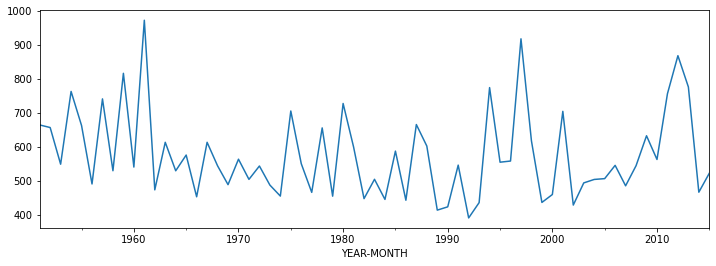

In [112]:
rainfall_data_max_y.plot(figsize=(12,4))

In [113]:
rainfall_data_max_q = rainfall_data.resample(rule='QS').max()
rainfall_data_max_q.head(5)

YEAR-MONTH
1951-01-01     82.7
1951-04-01    619.9
1951-07-01    665.3
1951-10-01    489.0
1952-01-01     69.7
Freq: QS-JAN, Name: RAINFALL, dtype: float64

<AxesSubplot:xlabel='YEAR-MONTH'>

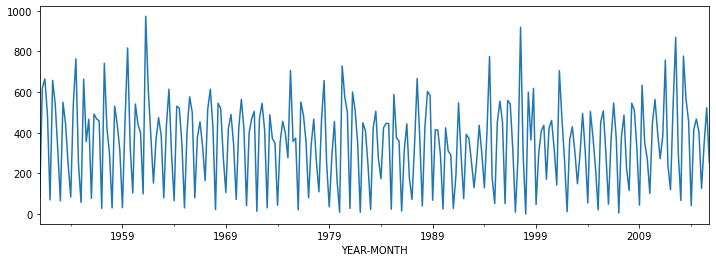

In [114]:
rainfall_data_max_q.plot(figsize=(12,4))

In [115]:
rainfall_data.resample(rule='A').mean()
rainfall_data.head(5)

YEAR-MONTH
1951-01-01     82.7
1951-02-01      7.2
1951-04-01     45.4
1951-05-01    259.0
1951-06-01    619.9
Name: RAINFALL, dtype: float64

<AxesSubplot:xlabel='YEAR-MONTH'>

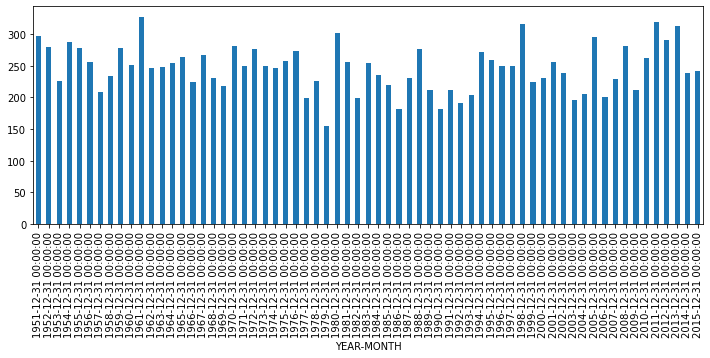

In [116]:
rainfall_data.resample(rule='A').mean().plot(kind='bar',figsize=(12,4))

In [117]:
rainfall_data_r = pd.DataFrame(rainfall_data)
rainfall_data_r['1YR R'] = rainfall_data_r['RAINFALL'].rolling(window=12,min_periods=1).mean()

In [118]:
rainfall_data_r.head()

RAINFALL    1YR R
YEAR-MONTH                   
1951-01-01      82.7   82.700
1951-02-01       7.2   44.950
1951-04-01      45.4   45.100
1951-05-01     259.0   98.575
1951-06-01     619.9  202.840

<AxesSubplot:xlabel='YEAR-MONTH'>

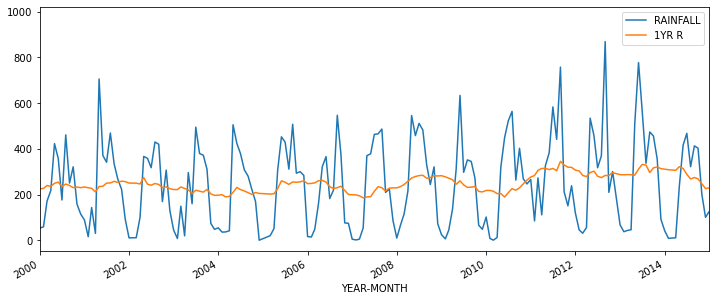

In [119]:
rainfall_data_r[['RAINFALL','1YR R']].plot(xlim=['2000-01-01','2015-01-01'],figsize=(12,5))

In [120]:
rainfall_data_cr = pd.DataFrame(rainfall_data)
rainfall_data_cr['1YR R'] = rainfall_data_cr['RAINFALL'].expanding().mean()

<AxesSubplot:xlabel='YEAR-MONTH'>

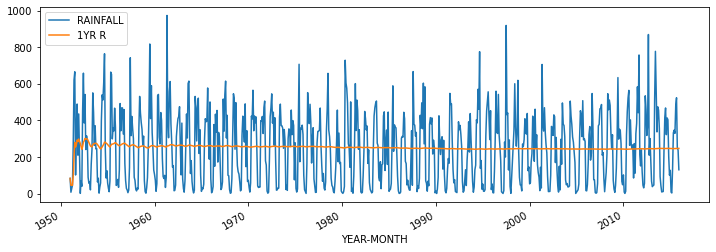

In [121]:
rainfall_data_cr.plot(figsize=(12,4))

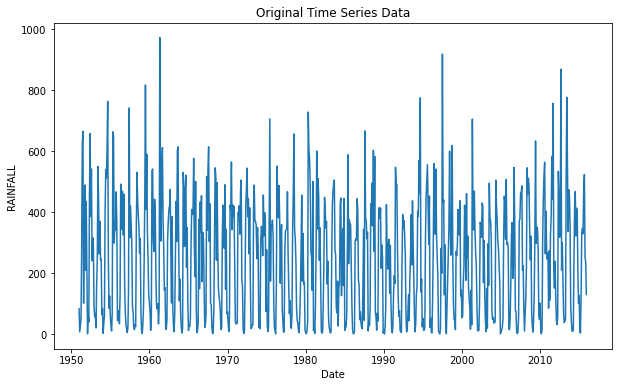

In [122]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

rainfall_data = pd.DataFrame(rainfall_data)
plt.figure(figsize=(10, 6))
plt.plot(rainfall_data['RAINFALL'])
plt.title('Original Time Series Data')
plt.xlabel('Date')
plt.ylabel('RAINFALL')
plt.show()

In [123]:

# Perform Augmented Dickey-Fuller test
result = adfuller(rainfall_data['RAINFALL'])
print("ADF Test Results:")
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Check p-value against significance level (e.g., 0.05)
if result[1] <= 0.05:
    print("Reject the null hypothesis. Data is stationary.")
else:
    print("Fail to reject the null hypothesis. Data is non-stationary.")

ADF Test Results:
ADF Statistic: -5.927086069354393
p-value: 2.4293139761758724e-07
Critical Values:
   1%: -3.4390409569041207
   5%: -2.865375732701395
   10%: -2.568812543748081
Reject the null hypothesis. Data is stationary.


<Figure size 1440x1080 with 0 Axes>

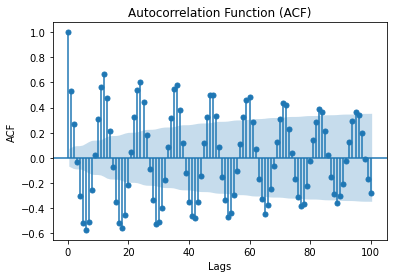

<Figure size 1440x1080 with 0 Axes>

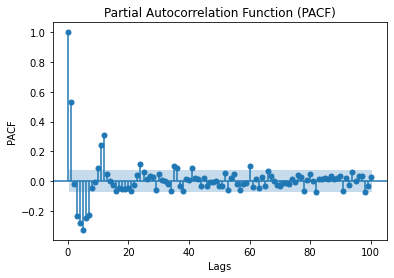

In [124]:
# Plot Autocorrelation Function (ACF)
plt.figure(figsize=(20, 15))
plot_acf(rainfall_data, lags=100)
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot Partial Autocorrelation Function (PACF)
plt.figure(figsize=(20, 15))
plot_pacf(rainfall_data, lags=100)
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [125]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2000,12,1)
test_dataset_end=datetime(2010,12,1)

In [126]:
train_data=rainfall_data[:train_dataset_end]
test_data=rainfall_data[train_dataset_end+timedelta(days=1):test_dataset_end]

In [127]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [128]:
test_data

RAINFALL
YEAR-MONTH          
2001-01-01      89.0
2001-02-01      15.7
2001-03-01     143.3
2001-04-01      30.1
2001-05-01     705.3
...              ...
2010-08-01     563.8
2010-09-01     263.3
2010-10-01     402.4
2010-11-01     268.5
2010-12-01     246.4

[117 rows x 1 columns]

In [129]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

# p=1,3,4,5,6,7,10,11,12  seasonal for sarimax = 6  ,q =10/54

model_ARIMA=ARIMA(rainfall_data['RAINFALL'],order=(1,0,10))
model_Arima_fit=model_ARIMA.fit()
model_Arima_fit.summary()

C:\Users\ayodh\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\ayodh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               RAINFALL   No. Observations:                  767
Model:                    ARMA(1, 10)   Log Likelihood               -4914.903
Method:                       css-mle   S.D. of innovations            146.683
Date:                Sun, 27 Aug 2023   AIC                           9855.806
Time:                        23:32:52   BIC                           9916.158
Sample:                             0   HQIC                          9879.037
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             246.3376      5.692     43.279      0.000     235.182     257.494
ar.L1.RAINFALL      0.7537      0.061     12.335      0.000       0.634       0.873
ma.L1.RAINFALL     -0.4283      0.069     -6.242      0.000      -0.563      -0.294
ma.L2.RAINFALL     -0.1555      0.041     -3.748      0.000      -0.237      -0.074
ma.L3.RAINFALL     -0.1128      0.047     -2.415      0.016      -0.204      -0.021
ma.L4.RAINFALL     -0.0400      0.048     -0.827      0.408      -0.135       0.055
ma.L5.RAINFALL     -0.0934      0.052     -1.809      0.071      -0.195       0.008
ma.L6.RAINFALL     -0.0879      0.041     -2.161      0.031      -0.168      -0.008
ma.L7.RAINFALL     -0.1450      0.056     -2.606      0.009      -0.254      -0.036
ma.L8.RAINFALL      0.0598      0.045      1.317      0.188      -0.029       0.149
ma.L9.RAINFALL      0.0967      0.050      1.945      0.052      -0.001       0.194
ma.L10.RAINFALL     0.1718      0.038      4.538      0.000       0.098       0.246
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.3268           +0.0000j            1.3268            0.0000
MA.1             1.0601           -0.1640j            1.0727           -0.0244
MA.2             1.0601           +0.1640j            1.0727            0.0244
MA.3             0.6622           -0.8910j            1.1101           -0.1483
MA.4             0.6622           +0.8910j            1.1101            0.1483
MA.5            -0.0771           -1.2358j            1.2382           -0.2599
MA.6            -0.0771           +1.2358j            1.2382            0.2599
MA.7            -1.1615           -0.4375j            1.2411           -0.4427
MA.8            -1.1615           +0.4375j            1.2411            0.4427
MA.9            -0.7652           -1.0737j            1.3184           -0.3485
MA.10           -0.7652           +1.0737j            1.3184            0.3485
------------------------------------------------------------------------------
"""

In [130]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2001-01-01 00:00:00
2010-12-01 00:00:00


In [131]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=rainfall_data['RAINFALL']-pred

In [132]:
pred

YEAR-MONTH
2001-01-01    171.185654
2001-02-01    198.985763
2001-03-01    162.388504
2001-04-01    223.281098
2001-05-01    177.762317
                 ...    
2010-08-01    397.785937
2010-09-01    414.845216
2010-10-01    296.278230
2010-11-01    304.210310
2010-12-01    172.356988
Length: 117, dtype: float64

In [133]:
residuals

YEAR-MONTH
1951-01-01   NaN
1951-02-01   NaN
1951-04-01   NaN
1951-05-01   NaN
1951-06-01   NaN
              ..
2015-08-01   NaN
2015-09-01   NaN
2015-10-01   NaN
2015-11-01   NaN
2015-12-01   NaN
Length: 767, dtype: float64

<AxesSubplot:ylabel='Density'>

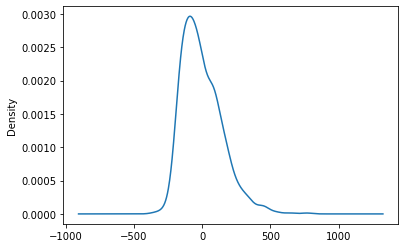

In [134]:
model_Arima_fit.resid.plot(kind='kde')

In [135]:
test_data['Predicted_ARIMA']=pred

C:\Users\ayodh\AppData\Local\Temp/ipykernel_2992/95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='YEAR-MONTH'>

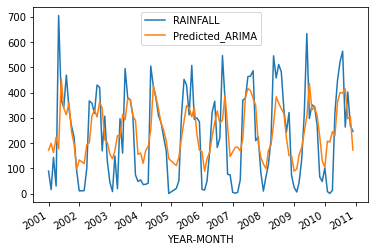

In [136]:
test_data[['RAINFALL','Predicted_ARIMA']].plot()